In [1]:
pwd

In [2]:
# imoport relevant libraries
import time
start_time = time.time()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
import sys
!{sys.executable} -m pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
!pip install lightgbm
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
#  IMPORT THE GIVEN DATA
gwarn_data= pd.read_csv("iowa_train.csv")

In [4]:
gwarn_data_test = pd.read_csv("iowa_test.csv")

In [5]:
gwarn_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
gwarn_data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [7]:
gwarn_data.shape

(1460, 81)

In [8]:
gwarn_data.columns.values


array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [9]:
gwarn_data_test .head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [10]:
gwarn_data_test.shape

(1459, 80)

In [11]:
# .Now we can do feature selection to select only essential features for the study:
# .in order to optimised the efficiency of our study, basic data preprocessing will be done.
# ie > Checking for missing values (NaN), Standardizing the data,
# Test for Categorical data and convert to numerical( Label encoding, One hot encoding or Get dummy)


In [12]:
# condition one: Columns with missing data greater than 75 % will be deleted
# Not also in a proper contest, it is a good practise to justify that the NaN are actually missing data
gwarn_data.isnull().values.any()

True

In [13]:
gwarn_data_test.isnull().values.any()

True

In [14]:
total =  gwarn_data.isnull().sum().sort_values(ascending=False)
percent = ( gwarn_data.isnull().sum()/  gwarn_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(18)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479

In [15]:
total =  gwarn_data_test.isnull().sum().sort_values(ascending=False)
percent = ( gwarn_data_test.isnull().sum()/  gwarn_data_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(18)

Total   Percent
PoolQC         1456  0.997944
MiscFeature    1408  0.965045
Alley          1352  0.926662
Fence          1169  0.801234
FireplaceQu     730  0.500343
LotFrontage     227  0.155586
GarageCond       78  0.053461
GarageQual       78  0.053461
GarageYrBlt      78  0.053461
GarageFinish     78  0.053461
GarageType       76  0.052090
BsmtCond         45  0.030843
BsmtQual         44  0.030158
BsmtExposure     44  0.030158
BsmtFinType1     42  0.028787
BsmtFinType2     42  0.028787
MasVnrType       16  0.010966
MasVnrArea       15  0.010281

In [16]:
data_NaN = [i for i in gwarn_data.columns if gwarn_data[i].isnull().any()]

In [17]:
data_NaN

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [18]:
# Our condition is that columns with missing data > than 75% will be deleted

In [19]:
 missing_data_threshold = missing_data[ missing_data['Percent'] > 0.75]

In [20]:
 missing_data_threshold 

Total   Percent
PoolQC        1456  0.997944
MiscFeature   1408  0.965045
Alley         1352  0.926662
Fence         1169  0.801234

In [21]:
gwarn_data = gwarn_data.drop(['MiscFeature','Alley', 'Fence', 'PoolQC'],axis=1)

In [22]:
# Now I can fill in missing data with a value
gwarn_data.fillna(gwarn_data.mean(), inplace=True)

In [23]:
gwarn_data_test = gwarn_data_test.drop(['MiscFeature','Alley', 'Fence', 'PoolQC'],axis=1)

In [24]:
gwarn_data_test.fillna(gwarn_data_test.mean(), inplace=True)

In [25]:
gwarn_data.shape , gwarn_data_test.shape

((1460, 77), (1459, 76))

In [26]:
gwarn_data.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  

[2 rows x 77 columns]

In [27]:
gwarn_data_test.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0  1461          20       RH         80.0    11622   Pave      Reg   
1  1462          20       RL         81.0    14267   Pave      IR1   

  LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0         Lvl    AllPub    Inside  ...           0             0         0   
1         Lvl    AllPub    Corner  ...          36             0         0   

  ScreenPorch PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         120        0       0       6    2010        WD         Normal  
1           0        0   12500       6    2010        WD         Normal  

[2 rows x 76 columns]

In [28]:
# Now we seprate numerical data from categorical data
numeric_features_gwarn_data = gwarn_data.select_dtypes(include=[np.number])

In [29]:
numeric_features_gwarn_data.shape

(1460, 38)

In [30]:
numeric_features_gwarn_data_test = gwarn_data_test.select_dtypes(include=[np.number])

In [31]:
numeric_features_gwarn_data_test.shape

(1459, 37)

In [32]:
categorical_gwarn_data_train = gwarn_data.select_dtypes(include=[np.object])

In [33]:
categorical_gwarn_data_test = gwarn_data_test.select_dtypes(include=[np.object])

In [34]:
categorical_gwarn_data_train.shape , categorical_gwarn_data_test.shape

((1460, 39), (1459, 39))

In [35]:
categorical_gwarn_data_train.head(2)

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      CollgCr       Norm       Norm  ...          Gd        Typ         NaN   
1      Veenker      Feedr       Norm  ...          TA        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  

[2 rows x 39 columns]

In [36]:
categorical_gwarn_data_test.head(2)

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RH   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0        NAmes      Feedr       Norm  ...          TA        Typ         NaN   
1        NAmes       Norm       Norm  ...          Gd        Typ         NaN   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          Unf         TA         TA          Y       WD   
1     Attchd          Unf         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  

[2 rows x 39 columns]

In [37]:
dependable_gwarn_data = gwarn_data.iloc[:,-1]

In [38]:
dependable_gwarn_data

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [39]:
# Now we standardize the numerical data but first drop the id and the dependent feature (SalePrice)

numeric_features_gwarn_data = numeric_features_gwarn_data.drop(['SalePrice','Id'], axis = 1)

In [40]:
numeric_features_gwarn_data_test = numeric_features_gwarn_data_test.drop(['Id'], axis = 1)

In [41]:
numeric_features_gwarn_data.shape

(1460, 36)

In [42]:
numeric_features_gwarn_data_test.shape

(1459, 36)

In [43]:
numeric_features_gwarn_data_test_features = numeric_features_gwarn_data_test.columns.values

In [44]:
# review literatures to know when best to use either MinMaxScaler and StandardScaler.
# In this project I will use the StandardScaler approach to standardize the data.
sc_test = StandardScaler()
sc_test.fit(numeric_features_gwarn_data_test )
numeric_features_gwarn_data_test_scaled  = pd.DataFrame(data=sc_test.transform(numeric_features_gwarn_data_test),columns= numeric_features_gwarn_data_test_features) 

In [45]:
numeric_features_gwarn_data_features = numeric_features_gwarn_data.columns.values

In [46]:
sc= StandardScaler()
sc.fit(numeric_features_gwarn_data )
numeric_features_gwarn_data_scaled  = pd.DataFrame(data=sc.transform(numeric_features_gwarn_data),columns= numeric_features_gwarn_data_features ) 

In [47]:
numeric_features_gwarn_data_scaled.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.073375    -0.229372 -0.207142     0.651479    -0.517200   1.050994   
1   -0.872563     0.451936 -0.091886    -0.071836     2.179628   0.156734   
2    0.073375    -0.093110  0.073480     0.651479    -0.517200   0.984752   
3    0.309859    -0.456474 -0.096897     0.651479    -0.517200  -1.863632   
4    0.073375     0.633618  0.375148     1.374795    -0.517200   0.951632   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0      0.878668    0.511418    0.575425   -0.288653  ...    0.351000   
1     -0.429577   -0.574410    1.171992   -0.288653  ...   -0.060731   
2      0.830215    0.323060    0.092907   -0.288653  ...    0.631726   
3     -0.720298   -0.574410   -0.499274   -0.288653  ...    0.790804   
4      0.733308    1.364570    0.463568   -0.288653  ...    1.698485   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0   -0.752176     0.216503      -0.359325  -0.116339    -0.270208 -0.068692   
1    1.626195    -0.704483      -0.359325  -0.116339    -0.270208 -0.068692   
2   -0.752176    -0.070361      -0.359325  -0.116339    -0.270208 -0.068692   
3   -0.752176    -0.176048       4.092524  -0.116339    -0.270208 -0.068692   
4    0.780197     0.563760      -0.359325  -0.116339    -0.270208 -0.068692   

    MiscVal    MoSold    YrSold  
0 -0.087688 -1.599111  0.138777  
1 -0.087688 -0.489110 -0.614439  
2 -0.087688  0.990891  0.138777  
3 -0.087688 -1.599111 -1.367655  
4 -0.087688  2.100892  0.138777  

[5 rows x 36 columns]

In [48]:
# Now use the lightgbm to remove features with zero contributions
x_train, x_test, y_train, y_test = train_test_split(numeric_features_gwarn_data_scaled, dependable_gwarn_data, test_size=0.25, random_state=42)

In [49]:
x_train.shape,  y_train.shape,x_test.shape , y_test.shape

((1095, 36), (1095,), (365, 36), (365,))

In [50]:
# Initialize an empty array to hold feature importances
feature_importances_ = np.zeros(numeric_features_gwarn_data_scaled.shape[1])

In [51]:
model_lgb = lgb.LGBMRegressor()
model_lgb .fit(x_train,y_train)
# Record the feature importances
feature_importances_ += model_lgb.feature_importances_

In [52]:
feature_importances_ 

array([ 25., 120., 291.,  87.,  71., 164., 118., 112., 196.,  19.,  88.,
       229., 204.,  99.,   2., 288.,  18.,   0.,  19.,  12.,  26.,  12.,
        75.,  35.,  82.,  34., 193.,  90., 118.,  23.,   0.,  18.,   0.,
         2.,  74.,  56.])

In [53]:
from sklearn.metrics import r2_score
predictions = model_lgb.predict( x_test)
print(r2_score(y_test, predictions ))

0.8806662341583998


In [54]:
# Make sure to average feature importances!
feature_importances = feature_importances_ / 2
feature_importances = pd.DataFrame({'feature': list(numeric_features_gwarn_data_scaled.columns),'importance': feature_importances}).sort_values('importance', ascending =False)
feature_importances

feature  importance
2         LotArea       145.5
15      GrLivArea       144.0
11    TotalBsmtSF       114.5
12       1stFlrSF       102.0
8      BsmtFinSF1        98.0
26     GarageArea        96.5
5       YearBuilt        82.0
1     LotFrontage        60.0
6    YearRemodAdd        59.0
28    OpenPorchSF        59.0
7      MasVnrArea        56.0
13       2ndFlrSF        49.5
27     WoodDeckSF        45.0
10      BsmtUnfSF        44.0
3     OverallQual        43.5
24    GarageYrBlt        41.0
22   TotRmsAbvGrd        37.5
34         MoSold        37.0
4     OverallCond        35.5
35         YrSold        28.0
23     Fireplaces        17.5
25     GarageCars        17.0
20   BedroomAbvGr        13.0
0      MSSubClass        12.5
29  EnclosedPorch        11.5
9      BsmtFinSF2         9.5
18       FullBath         9.5
16   BsmtFullBath         9.0
31    ScreenPorch         9.0
21   KitchenAbvGr         6.0
19       HalfBath         6.0
14   LowQualFinSF         1.0
33        MiscVal         1.0
17   BsmtHalfBath         0.0
30      3SsnPorch         0.0
32       PoolArea         0.0

In [55]:
feature_importances_zero = feature_importances[feature_importances['importance']== 0.0]
feature_importances_zero

feature  importance
17  BsmtHalfBath         0.0
30     3SsnPorch         0.0
32      PoolArea         0.0

In [56]:
numeric_features_gwarn_data_scaled = numeric_features_gwarn_data_scaled.drop(['BsmtHalfBath','3SsnPorch','PoolArea'], axis= 1)

In [57]:
numeric_features_gwarn_data_test_scaled = numeric_features_gwarn_data_test_scaled.drop(['BsmtHalfBath','3SsnPorch','PoolArea'], axis= 1)

In [58]:
numeric_features_gwarn_data_scaled .shape

(1460, 33)

In [59]:
numeric_features_gwarn_data_test_scaled.shape

(1459, 33)

In [60]:
# Next is to text for Collinearity using Vif and heatmap correlectable
# using Vif,The rule of thumb is A value between 1 and 5 indicates moderate correlation between a given 
# explanatory variable and other explanatory variables in the model, A value greater than 5 indicates potentially severe correlation between a given 
#explanatory variable and other explanatory variables in the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(numeric_features_gwarn_data_scaled.values, i) for i in range(numeric_features_gwarn_data_scaled.shape[1])]
 
vif["features"] = numeric_features_gwarn_data_scaled.columns
 
print(vif)

    VIF_Factor       features
0     1.644246     MSSubClass
1     1.540153    LotFrontage
2     1.252220        LotArea
3     3.255493    OverallQual
4     1.585424    OverallCond
5     5.011693      YearBuilt
6     2.415313   YearRemodAdd
7     1.386531     MasVnrArea
8          inf     BsmtFinSF1
9          inf     BsmtFinSF2
10         inf      BsmtUnfSF
11         inf    TotalBsmtSF
12         inf       1stFlrSF
13         inf       2ndFlrSF
14         inf   LowQualFinSF
15         inf      GrLivArea
16    2.023934   BsmtFullBath
17    2.930490       FullBath
18    2.160726       HalfBath
19    2.304968   BedroomAbvGr
20    1.592331   KitchenAbvGr
21    4.852636   TotRmsAbvGrd
22    1.584418     Fireplaces
23    3.359992    GarageYrBlt
24    5.556336     GarageCars
25    5.463145     GarageArea
26    1.208791     WoodDeckSF
27    1.221318    OpenPorchSF
28    1.279000  EnclosedPorch
29    1.106425    ScreenPorch
30    1.021800        MiscVal
31    1.045466         MoSold
32    1.04

In [61]:
# Also confirming the multicollinearity for using the Zoomed HeatMap.
# Before final decision will be made on features to be removed,
# A comparison will be done with 1, correlations of features with target

collinearity_numeric_features_gwarn_data_scaled =pd.concat([numeric_features_gwarn_data_scaled,dependable_gwarn_data],axis =1)

In [62]:
collinearity_numeric_features_gwarn_data_scaled.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.073375    -0.229372 -0.207142     0.651479    -0.517200   1.050994   
1   -0.872563     0.451936 -0.091886    -0.071836     2.179628   0.156734   
2    0.073375    -0.093110  0.073480     0.651479    -0.517200   0.984752   
3    0.309859    -0.456474 -0.096897     0.651479    -0.517200  -1.863632   
4    0.073375     0.633618  0.375148     1.374795    -0.517200   0.951632   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageCars  \
0      0.878668    0.511418    0.575425   -0.288653  ...    0.311725   
1     -0.429577   -0.574410    1.171992   -0.288653  ...    0.311725   
2      0.830215    0.323060    0.092907   -0.288653  ...    0.311725   
3     -0.720298   -0.574410   -0.499274   -0.288653  ...    1.650307   
4      0.733308    1.364570    0.463568   -0.288653  ...    1.650307   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch   MiscVal  \
0    0.351000   -0.752176     0.216503      -0.359325    -0.270208 -0.087688   
1   -0.060731    1.626195    -0.704483      -0.359325    -0.270208 -0.087688   
2    0.631726   -0.752176    -0.070361      -0.359325    -0.270208 -0.087688   
3    0.790804   -0.752176    -0.176048       4.092524    -0.270208 -0.087688   
4    1.698485    0.780197     0.563760      -0.359325    -0.270208 -0.087688   

     MoSold    YrSold  SalePrice  
0 -1.599111  0.138777     208500  
1 -0.489110 -0.614439     181500  
2  0.990891  0.138777     223500  
3 -1.599111 -1.367655     140000  
4  2.100892  0.138777     250000  

[5 rows x 34 columns]

In [63]:
correlation = collinearity_numeric_features_gwarn_data_scaled.corr()
print(correlation['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
MoSold           0.046432
BsmtFinSF2      -0.011378
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'MoSold', 'BsmtFinSF2', 'MiscVal', 'LowQualFinSF', 'YrSold',
       'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')


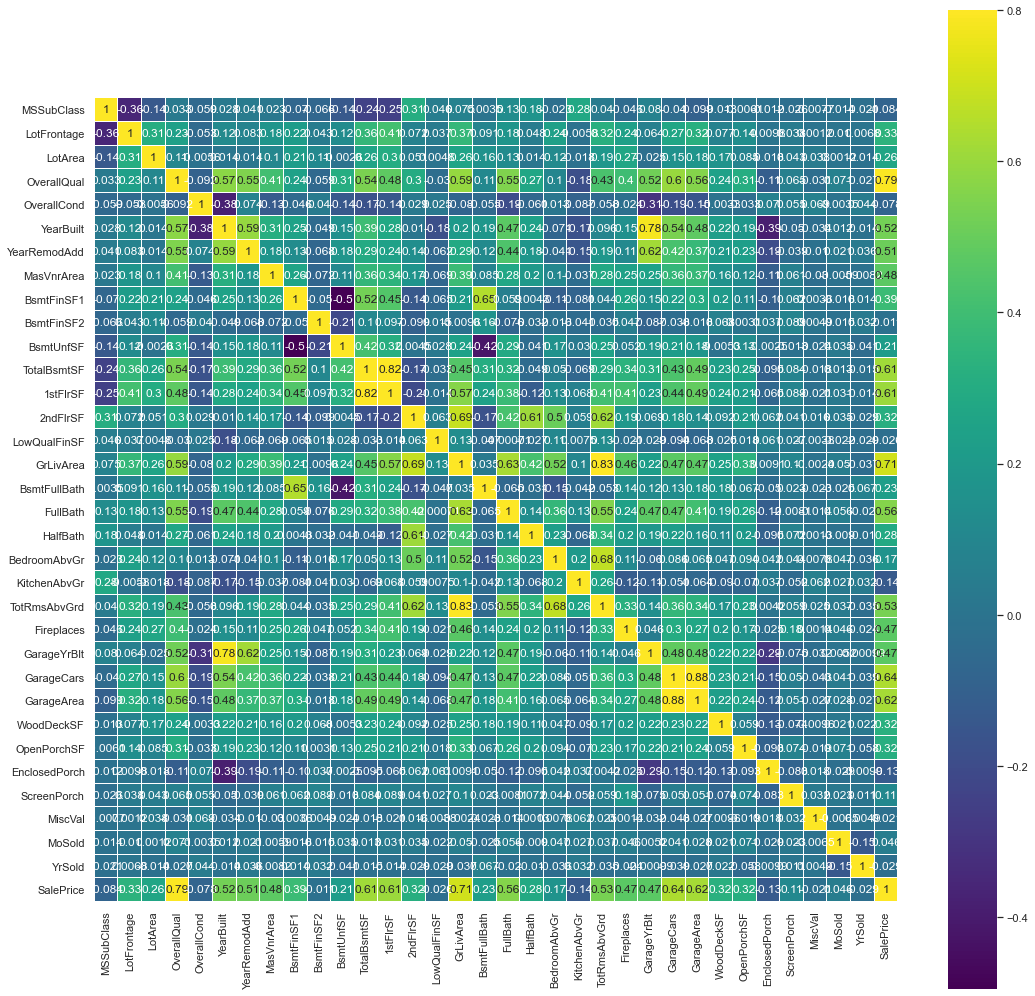

In [64]:
# Inspecting Multicollinearity using correlation.
# Zoomed HeatMap.
k= 35
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(collinearity_numeric_features_gwarn_data_scaled.values.T)
f , ax = plt.subplots(figsize = (18,18))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = collinearity_numeric_features_gwarn_data_scaled.columns ,annot_kws = {'size':12},yticklabels = collinearity_numeric_features_gwarn_data_scaled.columns)
plt.show()

In [65]:
# with vif of inf meaning perfect collinearity, there is need to check for duplications of columns
# extract the numpy array
values = numeric_features_gwarn_data_scaled.to_numpy()

# compare columns by columns

rows, cols = np.where(np.triu((values[:,:,None] == values[:,None, :]).all(0), 1))
duplicates =[numeric_features_gwarn_data_scaled.columns[[r,c]].values for r,c in zip(rows,cols)]
duplicates 

[]

In [66]:
numeric_features_new = numeric_features_gwarn_data_scaled.drop(['GarageYrBlt','1stFlrSF','GarageArea','TotalBsmtSF'],axis = 1)

In [67]:
numeric_features_gwarn_data_test_scaled = numeric_features_gwarn_data_test_scaled .drop(['GarageYrBlt','1stFlrSF','GarageArea','TotalBsmtSF'],axis = 1)

In [68]:
vif = pd.DataFrame()
vif["VIF_Factor_2"] = [variance_inflation_factor(numeric_features_new.values, i) for i in range(numeric_features_new.shape[1])]
 
vif["features_2"] = numeric_features_new.columns
 
print(vif)

    VIF_Factor_2     features_2
0       1.636757     MSSubClass
1       1.527531    LotFrontage
2       1.250713        LotArea
3       3.251724    OverallQual
4       1.549458    OverallCond
5       4.071357      YearBuilt
6       2.231595   YearRemodAdd
7       1.382602     MasVnrArea
8       5.316524     BsmtFinSF1
9       1.541730     BsmtFinSF2
10      4.142221      BsmtUnfSF
11      6.538678       2ndFlrSF
12      1.160520   LowQualFinSF
13     10.948738      GrLivArea
14      2.023533   BsmtFullBath
15      2.880996       FullBath
16      2.149101       HalfBath
17      2.289566   BedroomAbvGr
18      1.592095   KitchenAbvGr
19      4.840159   TotRmsAbvGrd
20      1.540538     Fireplaces
21      1.954195     GarageCars
22      1.200497     WoodDeckSF
23      1.208515    OpenPorchSF
24      1.278005  EnclosedPorch
25      1.105790    ScreenPorch
26      1.021267        MiscVal
27      1.045099         MoSold
28      1.045811         YrSold


In [69]:
# note GrLivArea has a high vif but when compared with TotRmsAbvGrd , its correlation to SalePrice was higher so it was kept.
# Then for thers with vif eqauls inf, removing a feature with inf with balace the solution.


# numeric_features_new is now our final data that should be preprocessed for modelling.
numeric_features_new.shape

(1460, 29)

In [70]:
# Now the categorical will be processed
# first convert to numerical data using get dummy

In [71]:
categorical_gwarn_data_train = pd.get_dummies(categorical_gwarn_data_train,drop_first=True)

In [72]:
categorical_gwarn_data_test= pd.get_dummies(categorical_gwarn_data_test,drop_first=True)

In [73]:
categorical_gwarn_data_train.shape , categorical_gwarn_data_test.shape

((1460, 200), (1459, 184))

In [74]:
# Select significants features using lightgbm

In [75]:
# Now use the lightgbm to remove features with zero contributions
x_train_cat, x_test_cat, y_train_cat, y_test_cat = train_test_split(categorical_gwarn_data_train , dependable_gwarn_data, test_size=0.25, random_state=42)

In [76]:
model_lgb_cat = lgb.LGBMRegressor()
model_lgb_cat.fit(x_train_cat,y_train_cat)
# Record the feature importances
feature_importances_ = np.zeros(categorical_gwarn_data_train.shape[1])
feature_importances_ += model_lgb_cat.feature_importances_

In [77]:
categorical_gwarn_data_train.shape , dependable_gwarn_data.shape

((1460, 200), (1460,))

In [78]:
feature_importances_ 

array([  8.,   0.,  31.,  18.,   0.,  31.,   0.,  81.,  16.,   4.,  41.,
         0.,  25.,  16.,   0.,  50.,  12.,   0.,   0.,   0.,   3.,   0.,
        23.,  29.,  21.,  17.,   5.,   0.,   4.,  26.,   0.,  18.,  69.,
        34.,  18.,   0.,  11.,   0.,  17.,  25.,   6.,   0.,  10.,  28.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   6.,  15.,  36.,   0., 104.,   0.,   0.,  74.,
        10.,   4.,  41.,   0.,  40.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  40.,   0.,  14.,  14.,   0.,  17.,
        24.,   0.,   0.,  35.,  15.,   0.,   0.,   0.,   0.,   0.,   9.,
         9.,   0.,   6.,   0.,   8.,   0.,   0.,  30.,  18.,  15.,  52.,
        55.,  28.,   0.,  55.,  58.,   8.,  19.,   0.,  16.,  54.,  32.,
         0.,   0.,   0.,   0.,  74.,  39.,  10.,   0.,  17.,  51.,  20.,
        89.,   9.,  62.,   5.,  13.,  47.,   0.,   0.,   3.,   2.,  21.,
        12.,   0.,   0.,   0.,   0.,  11.,  38.,   

In [79]:
# from sklearn.metrics import r2_score
predictions = model_lgb_cat.predict( x_test_cat)
print(r2_score(y_test_cat, predictions ))

0.7870331249821858


In [80]:
# Make sure to average feature importances!
feature_importances = feature_importances_ / 2
feature_importances= pd.DataFrame({'feature': list(categorical_gwarn_data_train.columns),'importance': feature_importances}).sort_values('importance', ascending =False)
feature_importances

feature  importance
62     HouseStyle_1Story        52.0
167       FireplaceQu_Gd        50.0
158       KitchenQual_Gd        44.5
132      BsmtExposure_No        44.5
7           LotShape_Reg        40.5
..                   ...         ...
72        RoofStyle_Shed         0.0
73      RoofMatl_CompShg         0.0
74      RoofMatl_Membran         0.0
75        RoofMatl_Metal         0.0
100  Exterior2nd_ImStucc         0.0

[200 rows x 2 columns]

In [81]:
pd.set_option('display.max_rows',feature_importances.shape[0]+1)
print(feature_importances)

                   feature  importance
62       HouseStyle_1Story        52.0
167         FireplaceQu_Gd        50.0
158         KitchenQual_Gd        44.5
132        BsmtExposure_No        44.5
7             LotShape_Reg        40.5
175       GarageFinish_RFn        37.5
65       HouseStyle_2Story        37.0
125            BsmtQual_Gd        37.0
169         FireplaceQu_TA        35.0
32    Neighborhood_NoRidge        34.5
134       BsmtFinType1_GLQ        31.0
159         KitchenQual_TA        30.5
176       GarageFinish_Unf        30.5
114           ExterQual_TA        29.0
110        MasVnrType_None        27.5
113           ExterQual_Gd        27.5
119      Foundation_CBlock        27.0
109     MasVnrType_BrkFace        26.0
130        BsmtExposure_Gd        25.5
15        LotConfig_Inside        25.0
170      GarageType_Attchd        24.0
137       BsmtFinType1_Unf        23.5
174      GarageType_Detchd        23.5
151           HeatingQC_TA        22.5
198   SaleCondition_Norma

In [82]:
# Find the features with zero importance
zero_features_2 = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
zero_features_2 

['Exterior2nd_Stucco',
 'Condition1_RRAe',
 'Neighborhood_SWISU',
 'GarageType_CarPort',
 'Neighborhood_SawyerW',
 'GarageType_Basment',
 'Neighborhood_Veenker',
 'Condition1_PosA',
 'FireplaceQu_Po',
 'Condition1_PosN',
 'Functional_Sev',
 'Condition2_Norm',
 'Functional_Mod',
 'Functional_Min2',
 'Functional_Min1',
 'Functional_Maj2',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Electrical_Mix',
 'Neighborhood_NPkVill',
 'Neighborhood_MeadowV',
 'Neighborhood_ClearCr',
 'SaleType_ConLD',
 'Street_Pave',
 'SaleCondition_Family',
 'SaleCondition_Alloca',
 'SaleCondition_AdjLand',
 'LotShape_IR3',
 'SaleType_Oth',
 'Utilities_NoSeWa',
 'SaleType_ConLw',
 'SaleType_ConLI',
 'SaleType_Con',
 'GarageQual_Gd',
 'SaleType_CWD',
 'LotConfig_FR3',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'GarageCond_Po',
 'GarageCond_Gd',
 'GarageCond_Fa',
 'Neighborhood_BrDale',
 'GarageQual_Po',
 'Electrical_FuseP',
 'Condition2_PosA',
 'Exterior2nd_Stone',
 'ExterCon

In [83]:
categorical_gwarn_data_train = categorical_gwarn_data_train.drop(columns = zero_features_2)

In [84]:
# categorical_gwarn_test= categorical_gwarn_data_test.drop(columns = zero_features_2)

In [85]:
categorical_gwarn_data_train.shape

(1460, 107)

In [86]:
# test for collinearity using vif and heatmap correlation

vif = pd.DataFrame()
vif["VIF_Factor_cat"] = [variance_inflation_factor(categorical_gwarn_data_train.values, i) for i in range(categorical_gwarn_data_train.shape[1])]
 
vif["features_cat"] = categorical_gwarn_data_train.columns
 
print(vif)

     VIF_Factor_cat           features_cat
0          8.113404            MSZoning_FV
1          6.446514            MSZoning_RL
2         12.260610            MSZoning_RM
3          1.218756           LotShape_IR2
4          0.694444           LotShape_Reg
5          2.132236        LandContour_HLS
6          1.954805        LandContour_Low
7          0.642649        LandContour_Lvl
8          1.605437      LotConfig_CulDSac
9          1.290657          LotConfig_FR2
10         0.145247       LotConfig_Inside
11         1.636585          LandSlope_Mod
12         2.057074   Neighborhood_BrkSide
13         2.841146   Neighborhood_CollgCr
14         1.688209   Neighborhood_Crawfor
15         2.088841   Neighborhood_Edwards
16         2.226976   Neighborhood_Gilbert
17         2.002486    Neighborhood_IDOTRR
18         1.599384   Neighborhood_Mitchel
19         3.957370     Neighborhood_NAmes
20         1.945461    Neighborhood_NWAmes
21         1.654579   Neighborhood_NoRidge
22         

In [87]:
 vif_above_threshold = vif[vif['VIF_Factor_cat'] >10]

In [88]:
 vif_above_threshold

VIF_Factor_cat           features_cat
2         12.260610            MSZoning_RM
41        23.622394    Exterior1st_CemntBd
42        11.821238    Exterior1st_HdBoard
43        28.943205    Exterior1st_MetalSd
47        24.031093    Exterior2nd_CmentBd
49        28.202495    Exterior2nd_MetalSd
51        21.951979    Exterior2nd_VinylSd
60        22.315293           ExterCond_Gd
103       46.126498           SaleType_New
106       46.121832  SaleCondition_Partial

In [89]:
categorical_gwarn_data_model = categorical_gwarn_data_train.drop(['MSZoning_RM','Exterior1st_CemntBd','Exterior1st_HdBoard','Exterior1st_MetalSd',
                                                           'Exterior2nd_CmentBd','Exterior2nd_MetalSd','Exterior2nd_VinylSd','ExterCond_Gd',
                                                           'SaleType_New','SaleCondition_Partial'], axis =1)

In [90]:
# This is the data that will be usewd for modeling.
categorical_gwarn_data_model.shape

(1460, 97)

In [91]:
# next will be to further preprocess the numerical data for the modeling.
# Before further cleaning the data, am going to investigate if the dataset explain a linear or non linear regression
# As that will decide if adhering to linear regression assuptions has to be obeyed. ie the label being normally distributed.
# To investigate if a data expresses a linear regression : (1) > virtuallly figure out if the relationship is linear or not. ie using a bivariate plot.(2) > Calculate the correlation coefficients btw independent and dependent variables.ie if the coefficient is 0.7 or higher there is  linear tendency and thus non-linear model is appropriate.  


In [92]:
numeric_features_new_regression_type = pd.concat([numeric_features_new,dependable_gwarn_data ],axis=1)

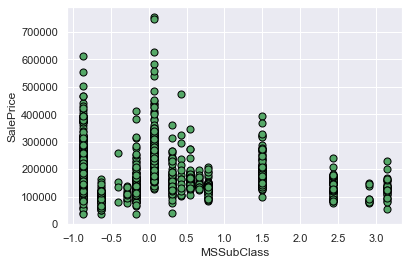

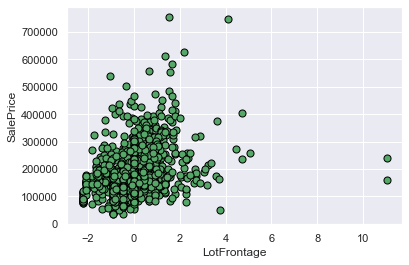

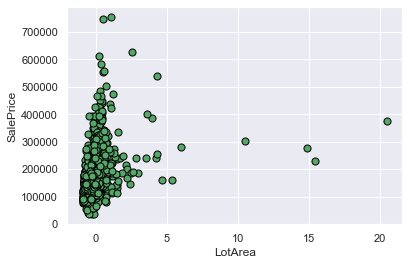

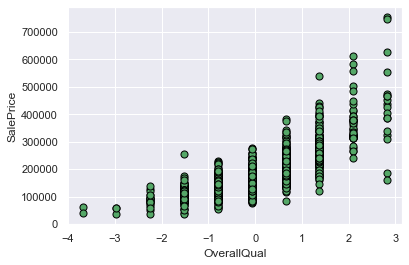

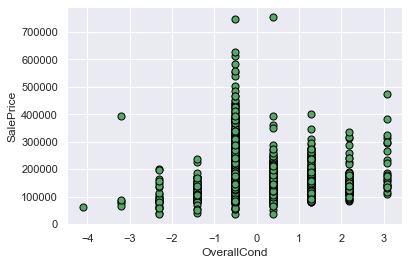

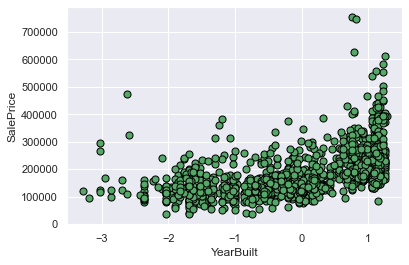

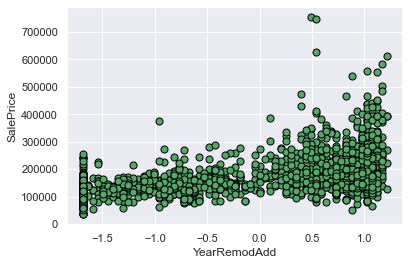

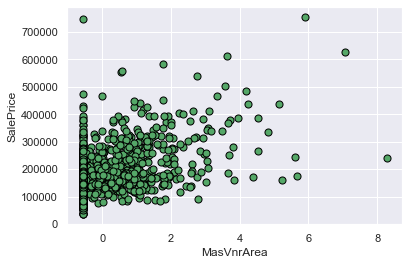

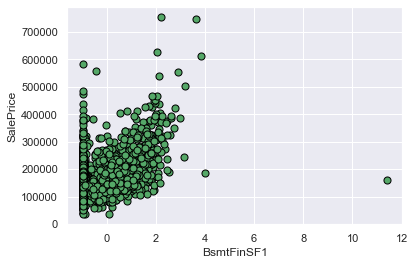

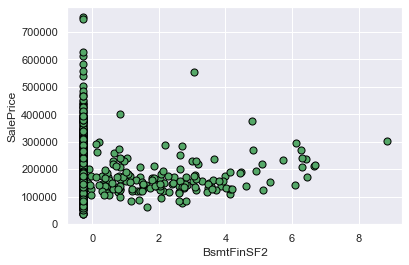

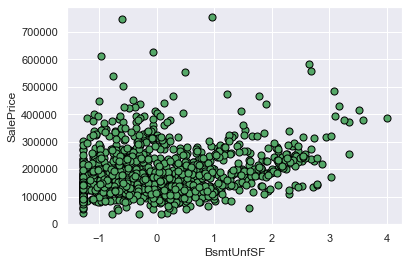

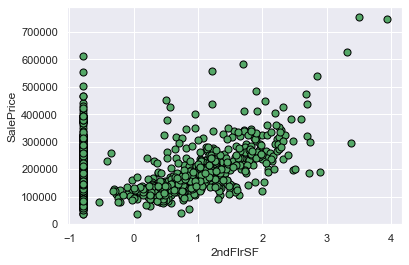

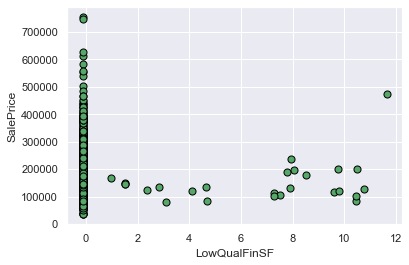

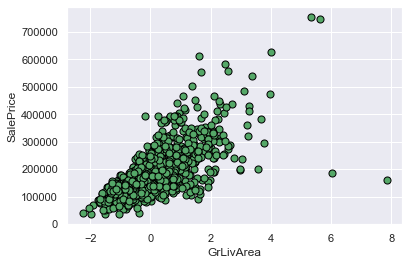

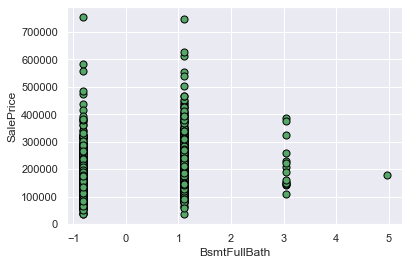

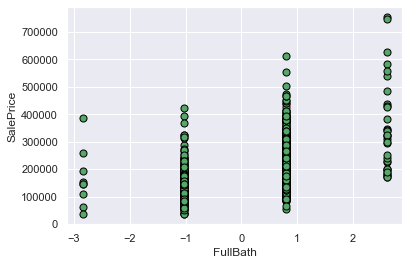

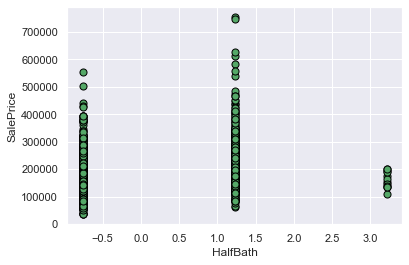

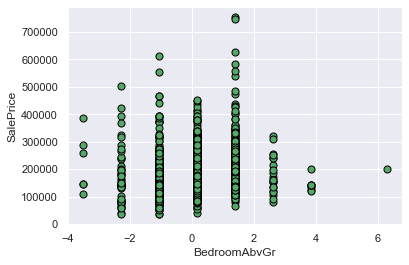

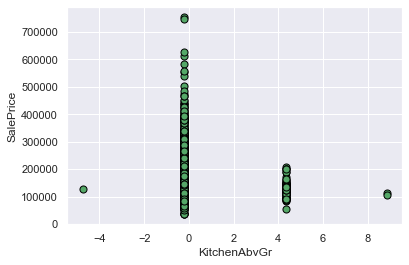

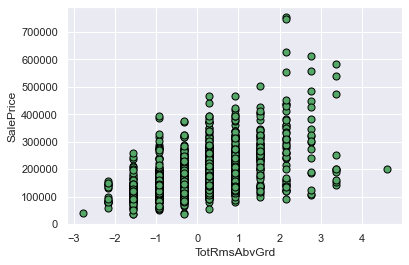

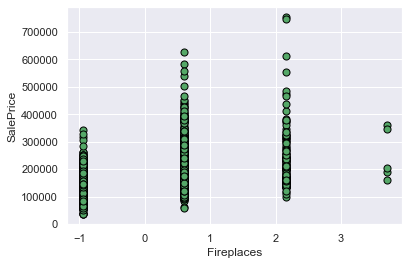

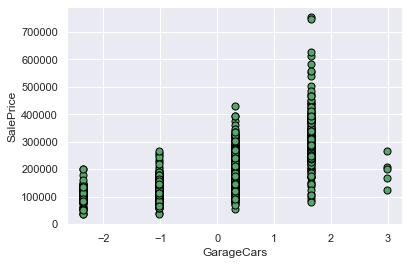

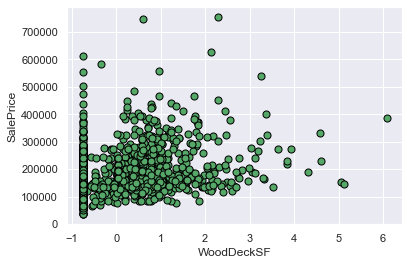

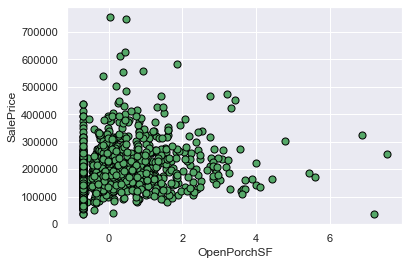

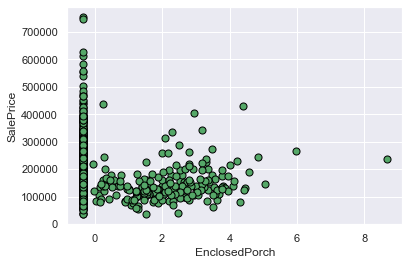

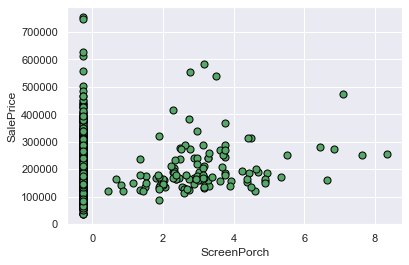

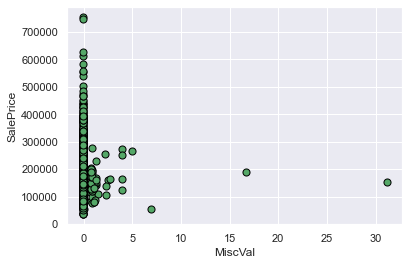

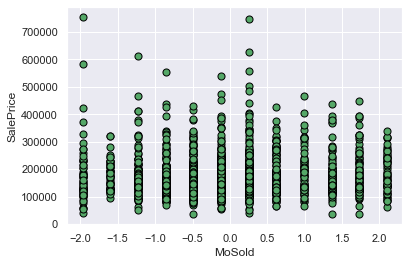

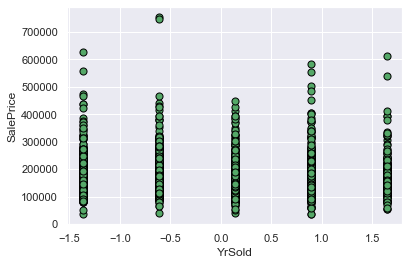

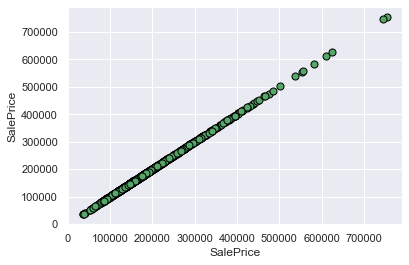

In [93]:
for i in numeric_features_new_regression_type.columns:
    numeric_features_new_regression_type.plot.scatter(i,'SalePrice', edgecolors=(0,0,0),s=50,c='g',grid=True)

In [94]:
correlation = numeric_features_new_regression_type .corr()
print(correlation['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
MoSold           0.046432
BsmtFinSF2      -0.011378
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



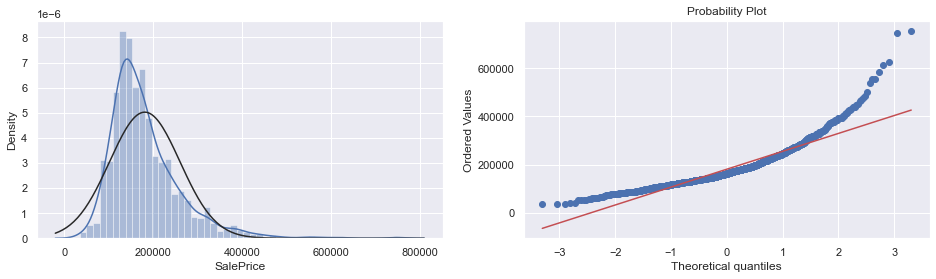

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [95]:
# comparing both the graph and correlation coefficients , it appears certain feaatures expresses linear while others dont.
# since effort will also be made to compare linear regression models with non linear regression models, the data will be preproceed
# Considering the assumptions of linear regression models.

from scipy import stats
from scipy.stats import skew,norm 
f,ax = plt.subplots(1,2,figsize=(16,4))
sns.distplot(numeric_features_new_regression_type['SalePrice'],ax=ax[0],fit=norm)
stats.probplot(numeric_features_new_regression_type['SalePrice'],plot=plt)
plt.show()

#skewness and kurtosis
print("Skewness: {}".format(numeric_features_new_regression_type['SalePrice'].skew()))
print("Kurtosis: {}".format(numeric_features_new_regression_type['SalePrice'].kurt()))

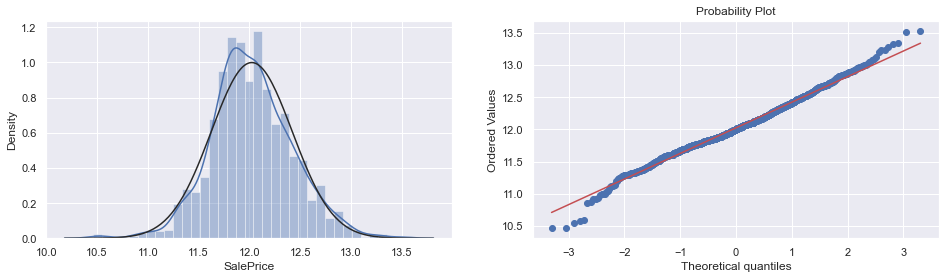

Skewness: 0.12133506220520406
Kurtosis: 0.8095319958036296


In [96]:
SalePrice_log = np.log(numeric_features_new_regression_type['SalePrice'])
f,ax = plt.subplots(1,2,figsize=(16,4))
sns.distplot(SalePrice_log,fit=norm,ax=ax[0])
stats.probplot(SalePrice_log,plot=plt)
plt.show()

#skewness and kurtosis
print("Skewness: {}".format(SalePrice_log.skew()))
print("Kurtosis: {}".format(SalePrice_log.kurt()))

In [97]:
# The acceptable range of skewness or kurtosis is between +1.5 and -1.5(Tabachnick and fidell,2013) if not you have to consider transforming the data.
# Referring to Applied Predictive Analysis by Dean Abbott, it is useful to correct any skewness in the predictor but this will not be done in this project.



numeric_features_new_regression_type['SalePrice_log'] = np.log(numeric_features_new_regression_type['SalePrice'])

In [98]:
numeric_features_new_regression_type.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.073375    -0.229372 -0.207142     0.651479    -0.517200   1.050994   
1   -0.872563     0.451936 -0.091886    -0.071836     2.179628   0.156734   
2    0.073375    -0.093110  0.073480     0.651479    -0.517200   0.984752   
3    0.309859    -0.456474 -0.096897     0.651479    -0.517200  -1.863632   
4    0.073375     0.633618  0.375148     1.374795    -0.517200   0.951632   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageCars  \
0      0.878668    0.511418    0.575425   -0.288653  ...    0.311725   
1     -0.429577   -0.574410    1.171992   -0.288653  ...    0.311725   
2      0.830215    0.323060    0.092907   -0.288653  ...    0.311725   
3     -0.720298   -0.574410   -0.499274   -0.288653  ...    1.650307   
4      0.733308    1.364570    0.463568   -0.288653  ...    1.650307   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch   MiscVal    MoSold  \
0   -0.752176     0.216503      -0.359325    -0.270208 -0.087688 -1.599111   
1    1.626195    -0.704483      -0.359325    -0.270208 -0.087688 -0.489110   
2   -0.752176    -0.070361      -0.359325    -0.270208 -0.087688  0.990891   
3   -0.752176    -0.176048       4.092524    -0.270208 -0.087688 -1.599111   
4    0.780197     0.563760      -0.359325    -0.270208 -0.087688  2.100892   

     YrSold  SalePrice  SalePrice_log  
0  0.138777     208500      12.247694  
1 -0.614439     181500      12.109011  
2  0.138777     223500      12.317167  
3 -1.367655     140000      11.849398  
4  0.138777     250000      12.429216  

[5 rows x 31 columns]

In [99]:
numeric_features_new_regression_type_drop = numeric_features_new_regression_type.drop(['SalePrice'], axis =1)

In [100]:
numeric_features_new_regression_type_drop.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.073375    -0.229372 -0.207142     0.651479    -0.517200   1.050994   
1   -0.872563     0.451936 -0.091886    -0.071836     2.179628   0.156734   
2    0.073375    -0.093110  0.073480     0.651479    -0.517200   0.984752   
3    0.309859    -0.456474 -0.096897     0.651479    -0.517200  -1.863632   
4    0.073375     0.633618  0.375148     1.374795    -0.517200   0.951632   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  Fireplaces  \
0      0.878668    0.511418    0.575425   -0.288653  ...   -0.951226   
1     -0.429577   -0.574410    1.171992   -0.288653  ...    0.600495   
2      0.830215    0.323060    0.092907   -0.288653  ...    0.600495   
3     -0.720298   -0.574410   -0.499274   -0.288653  ...    0.600495   
4      0.733308    1.364570    0.463568   -0.288653  ...    0.600495   

   GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch   MiscVal  \
0    0.311725   -0.752176     0.216503      -0.359325    -0.270208 -0.087688   
1    0.311725    1.626195    -0.704483      -0.359325    -0.270208 -0.087688   
2    0.311725   -0.752176    -0.070361      -0.359325    -0.270208 -0.087688   
3    1.650307   -0.752176    -0.176048       4.092524    -0.270208 -0.087688   
4    1.650307    0.780197     0.563760      -0.359325    -0.270208 -0.087688   

     MoSold    YrSold  SalePrice_log  
0 -1.599111  0.138777      12.247694  
1 -0.489110 -0.614439      12.109011  
2  0.990891  0.138777      12.317167  
3 -1.599111 -1.367655      11.849398  
4  2.100892  0.138777      12.429216  

[5 rows x 30 columns]

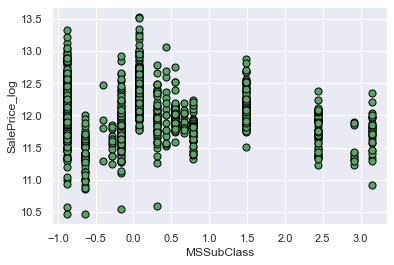

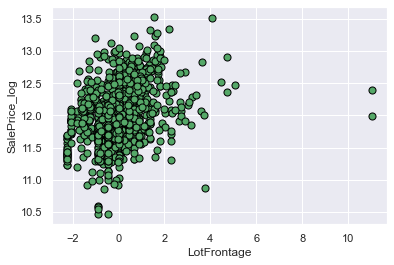

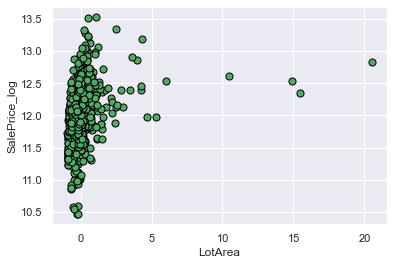

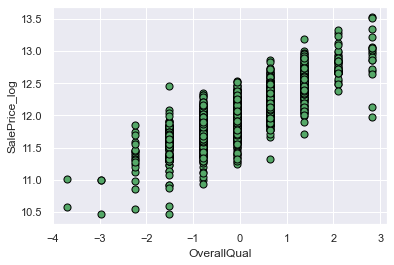

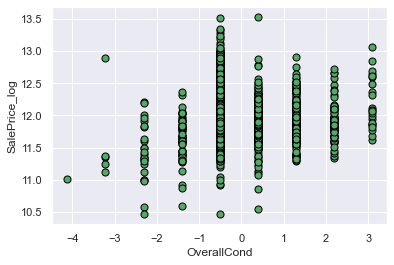

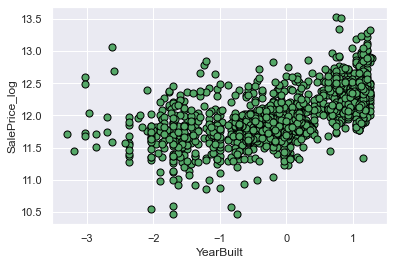

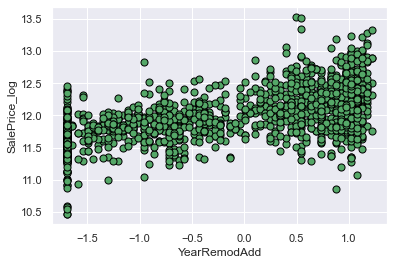

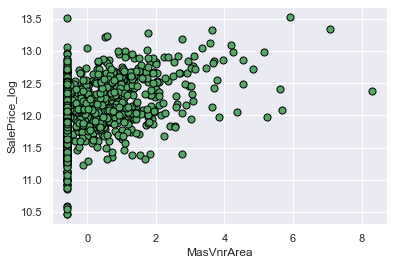

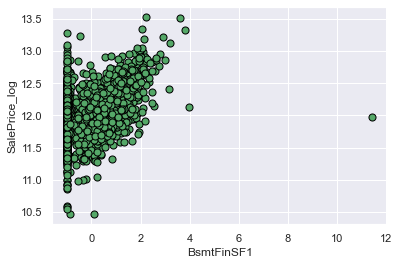

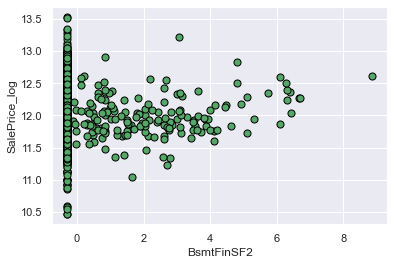

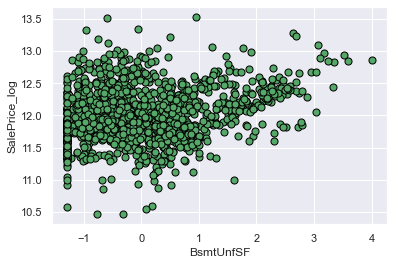

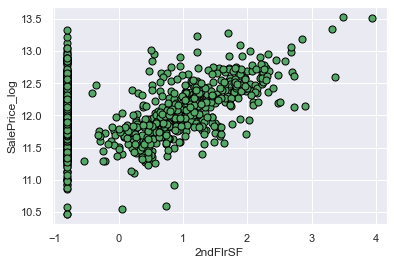

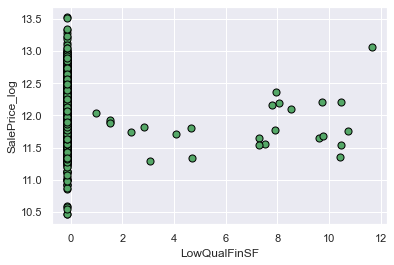

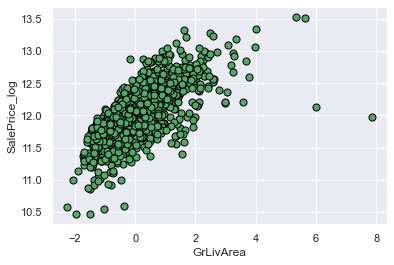

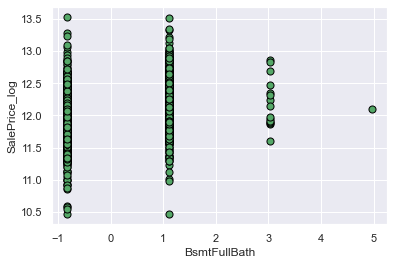

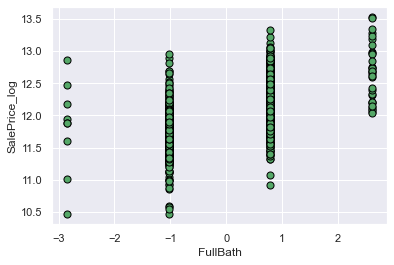

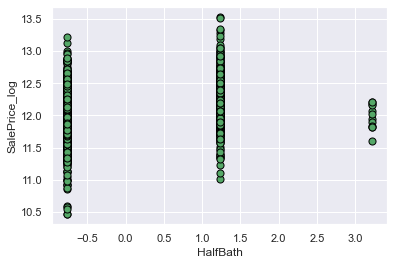

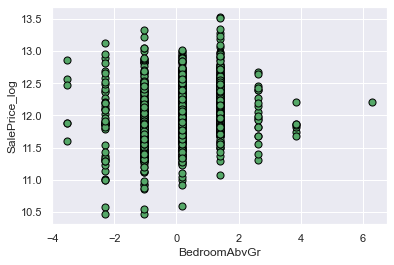

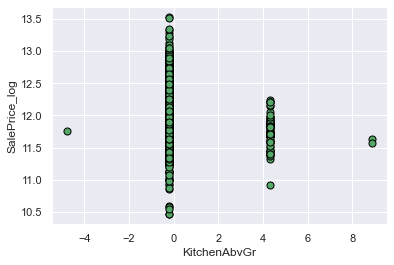

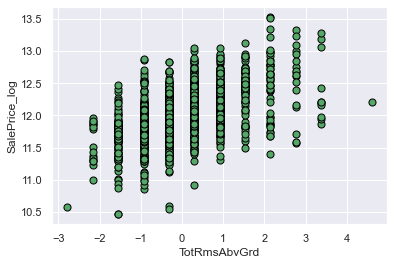

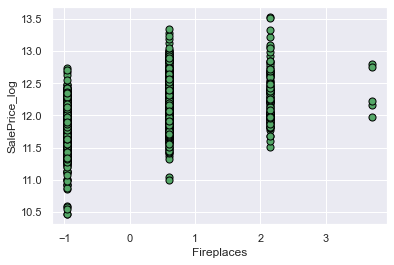

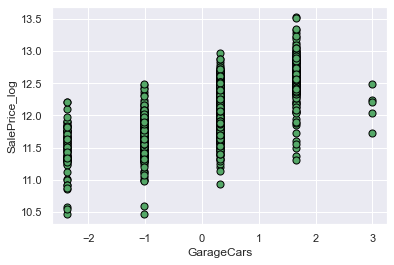

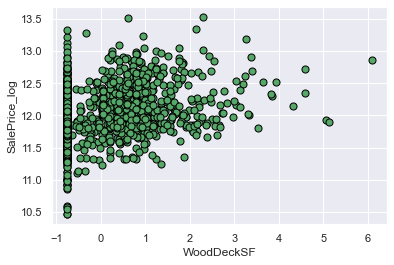

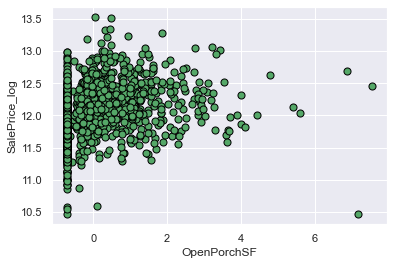

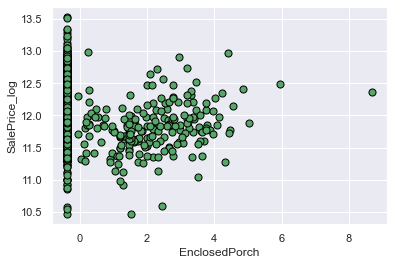

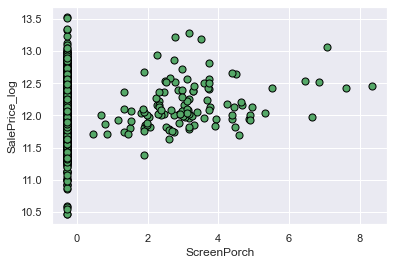

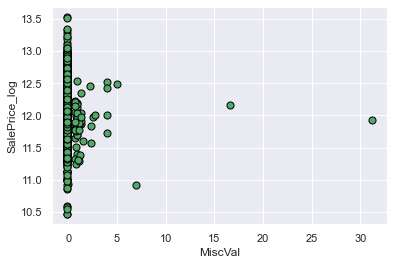

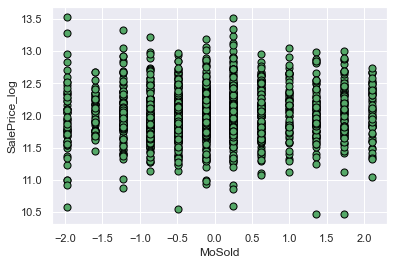

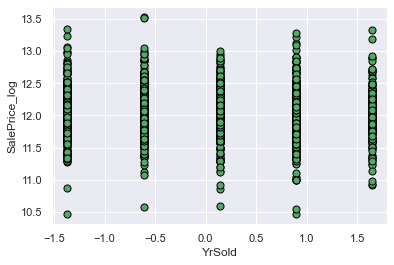

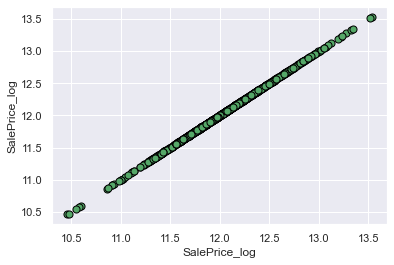

In [101]:
# testing again for linearity. this time with the normalised SalePrice
for i in numeric_features_new_regression_type_drop :
    numeric_features_new_regression_type_drop .plot.scatter(i,'SalePrice_log', edgecolors=(0,0,0),s=50,c='g',grid=True)

In [102]:
correlation = numeric_features_new_regression_type_drop .corr()
print(correlation['SalePrice_log'].sort_values(ascending = False),'\n')

SalePrice_log    1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.429531
BsmtFinSF1       0.372023
LotFrontage      0.336156
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
MoSold           0.057329
BsmtFinSF2       0.004832
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice_log, dtype: float64 



In [103]:
# This will help to check for outliers
numeric_features_new_regression_type_drop.describe()

MSSubClass   LotFrontage       LotArea   OverallQual   OverallCond  \
count  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03   
mean  -1.504124e-16  3.410514e-16 -4.202783e-17 -7.680310e-17  3.692632e-16   
std    1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+00   
min   -8.725628e-01 -2.227875e+00 -9.237292e-01 -3.688413e+00 -4.112970e+00   
25%   -8.725628e-01 -4.564744e-01 -2.969908e-01 -7.951515e-01 -5.171998e-01   
50%   -1.631095e-01  6.454645e-16 -1.040633e-01 -7.183611e-02 -5.171998e-01   
75%    3.098594e-01  4.065156e-01  1.087080e-01  6.514792e-01  3.817427e-01   
max    3.147673e+00  1.103492e+01  2.051827e+01  2.821425e+00  3.078570e+00   

          YearBuilt  YearRemodAdd    MasVnrArea    BsmtFinSF1    BsmtFinSF2  \
count  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03   
mean   1.032983e-15  4.518912e-15  1.630355e-16  1.505645e-17  1.653168e-16   
std    1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+00   
min   -3.287824e+00 -1.689368e+00 -5.744105e-01 -9.730182e-01 -2.886528e-01   
25%   -5.719226e-01 -8.656586e-01 -5.744105e-01 -9.730182e-01 -2.886528e-01   
50%    5.737148e-02  4.425864e-01 -5.744105e-01 -1.319022e-01 -2.886528e-01   
75%    9.516316e-01  9.271216e-01  3.355252e-01  5.891327e-01 -2.886528e-01   
max    1.282839e+00  1.217843e+00  8.289499e+00  1.140575e+01  8.851638e+00   

       ...    Fireplaces    GarageCars    WoodDeckSF   OpenPorchSF  \
count  ...  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03   
mean   ...  2.701036e-16  2.585451e-17  2.190029e-16  3.357284e-17   
std    ...  1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+00   
min    ... -9.512265e-01 -2.365440e+00 -7.521758e-01 -7.044833e-01   
25%    ... -9.512265e-01 -1.026858e+00 -7.521758e-01 -7.044833e-01   
50%    ...  6.004949e-01  3.117246e-01 -7.521758e-01 -3.270298e-01   
75%    ...  6.004949e-01  3.117246e-01  5.886506e-01  3.221901e-01   
max    ...  3.703938e+00  2.988889e+00  6.087635e+00  7.554198e+00   

       EnclosedPorch   ScreenPorch       MiscVal        MoSold        YrSold  \
count   1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03   
mean    1.379034e-16  1.199193e-16  2.409602e-16 -6.395189e-17  3.566101e-14   
std     1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+00   
min    -3.593249e-01 -2.702084e-01 -8.768781e-02 -1.969111e+00 -1.367655e+00   
25%    -3.593249e-01 -2.702084e-01 -8.768781e-02 -4.891101e-01 -6.144386e-01   
50%    -3.593249e-01 -2.702084e-01 -8.768781e-02 -1.191097e-01  1.387775e-01   
75%    -3.593249e-01 -2.702084e-01 -8.768781e-02  6.208910e-01  8.919936e-01   
max     8.675309e+00  8.341462e+00  3.116527e+01  2.100892e+00  1.645210e+00   

       SalePrice_log  
count    1460.000000  
mean       12.024051  
std         0.399452  
min        10.460242  
25%        11.775097  
50%        12.001505  
75%        12.273731  
max        13.534473  

[8 rows x 30 columns]

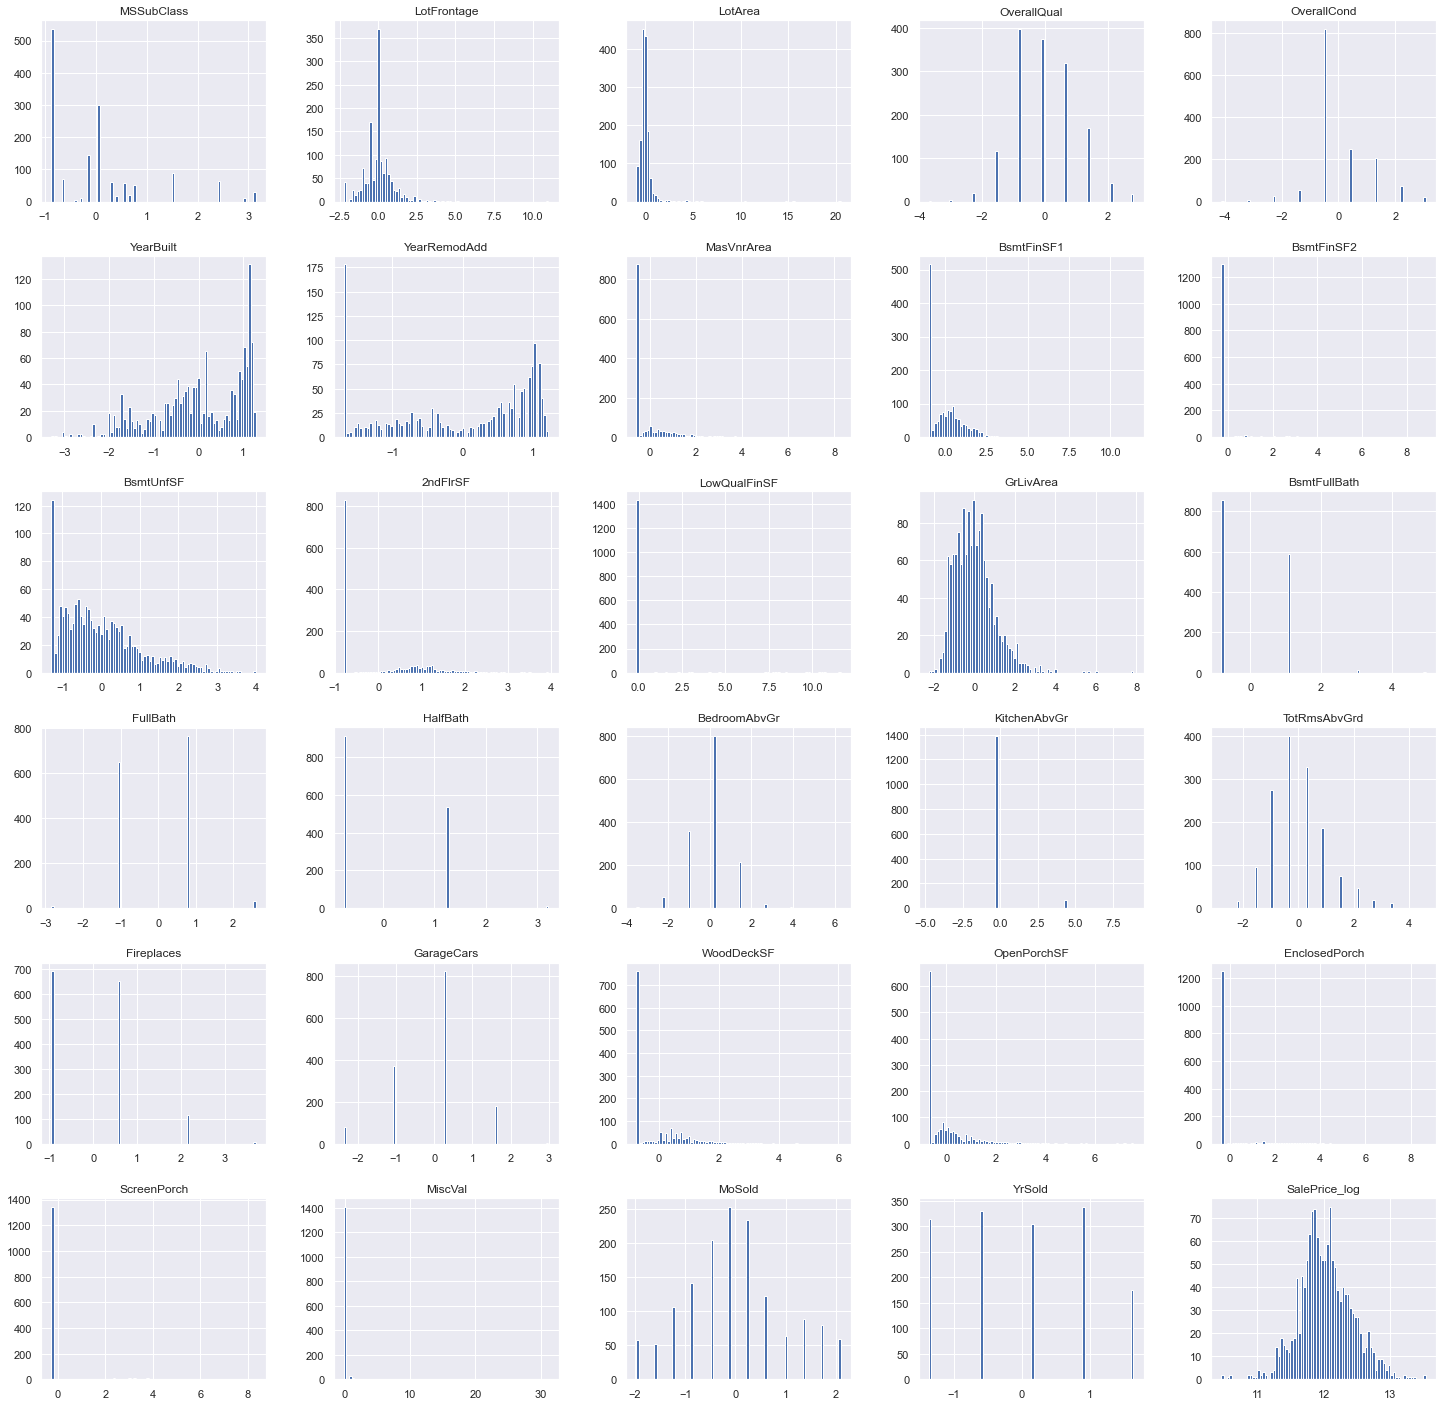

In [104]:
numeric_features_new_regression_type_drop.hist(bins=80, figsize=(25,25))
plt.savefig("attribute_histogram_plots")
plt.show()

In [105]:
Q1 = numeric_features_new_regression_type_drop.quantile(0.25)
Q3 = numeric_features_new_regression_type_drop.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MSSubClass       1.182422
LotFrontage      0.862990
LotArea          0.405699
OverallQual      1.446631
OverallCond      0.898943
YearBuilt        1.523554
YearRemodAdd     1.792780
MasVnrArea       0.909936
BsmtFinSF1       1.562151
BsmtFinSF2       0.000000
BsmtUnfSF        1.324382
2ndFlrSF         1.668275
LowQualFinSF     0.000000
GrLivArea        1.232152
BsmtFullBath     1.927775
FullBath         1.815781
HalfBath         1.989206
BedroomAbvGr     1.226244
KitchenAbvGr     0.000000
TotRmsAbvGrd     1.230893
Fireplaces       1.551721
GarageCars       1.338582
WoodDeckSF       1.340826
OpenPorchSF      1.026673
EnclosedPorch    0.000000
ScreenPorch      0.000000
MiscVal          0.000000
MoSold           1.110001
YrSold           1.506432
SalePrice_log    0.498634
dtype: float64


In [106]:
#The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence

In [107]:
Check_outliers_numerical = (numeric_features_new_regression_type_drop < (Q1 - 1.5 * IQR)) |(numeric_features_new_regression_type_drop> (Q3 + 1.5 * IQR))

In [108]:
Check_outliers_numerical.head(20)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        False        False    False        False        False      False   
1        False        False    False        False         True      False   
2        False        False    False        False        False      False   
3        False        False    False        False        False      False   
4        False        False    False        False        False      False   
5        False        False    False        False        False      False   
6        False        False    False        False        False      False   
7        False        False    False        False        False      False   
8        False        False    False        False        False      False   
9         True        False    False        False        False      False   
10       False        False    False        False        False      False   
11       False        False    False        False        False      False   
12       False        False    False        False        False      False   
13       False        False    False        False        False      False   
14       False        False    False        False        False      False   
15       False        False    False        False         True      False   
16       False        False    False        False        False      False   
17       False        False    False        False        False      False   
18       False        False    False        False        False      False   
19       False        False    False        False        False      False   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  Fireplaces  \
0          False       False       False       False  ...       False   
1          False       False       False       False  ...       False   
2          False       False       False       False  ...       False   
3          False       False       False       False  ...       False   
4          False       False       False       False  ...       False   
5          False       False       False       False  ...       False   
6          False       False       False       False  ...       False   
7          False       False       False        True  ...       False   
8          False       False       False       False  ...       False   
9          False       False       False       False  ...       False   
10         False       False       False       False  ...       False   
11         False       False       False       False  ...       False   
12         False       False       False       False  ...       False   
13         False       False       False       False  ...       False   
14         False       False       False       False  ...       False   
15         False       False       False       False  ...       False   
16         False       False       False       False  ...       False   
17         False       False       False       False  ...       False   
18         False       False       False       False  ...       False   
19         False       False       False       False  ...       False   

    GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MiscVal  \
0        False       False        False          False        False    False   
1        False       False        False          False        False    False   
2        False       False        False          False        False    False   
3        False       False        False           True        False    False   
4        False       False        False          False        False    False   
5        False       False        False          False        False     True   
6        False       False        False          False        False    False   
7        False       False         True           True        False     True   
8        False       False        False           True        False    False   
9        False       False        False          Fal

In [109]:
# the Quantile-based Flooring and Capping approach of removing outliers

print(numeric_features_new_regression_type_drop['SalePrice_log'].quantile(0.10)) 
print(numeric_features_new_regression_type_drop['SalePrice_log'].quantile(0.90)) 

11.57566524639712
12.535376392672774


In [110]:
numeric_features_new_regression_type_drop['SalePrice_log'] = np.where(numeric_features_new_regression_type_drop['SalePrice_log'] >12.535376392672774 ,12.535376392672774, numeric_features_new_regression_type_drop['SalePrice_log'])
numeric_features_new_regression_type_drop['SalePrice_log'] = np.where(numeric_features_new_regression_type_drop['SalePrice_log'] <11.57566524639712 ,11.57566524639712, numeric_features_new_regression_type_drop['SalePrice_log'])

<AxesSubplot:xlabel='SalePrice_log'>

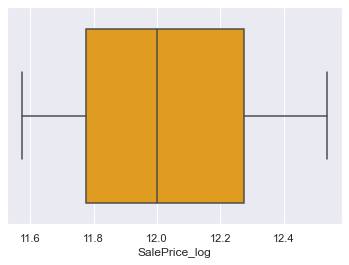

In [111]:
sns.boxplot(x= numeric_features_new_regression_type_drop['SalePrice_log'], color='orange')

In [112]:
numeric_features_new_regression_type_drop.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.073375    -0.229372 -0.207142     0.651479    -0.517200   1.050994   
1   -0.872563     0.451936 -0.091886    -0.071836     2.179628   0.156734   
2    0.073375    -0.093110  0.073480     0.651479    -0.517200   0.984752   
3    0.309859    -0.456474 -0.096897     0.651479    -0.517200  -1.863632   
4    0.073375     0.633618  0.375148     1.374795    -0.517200   0.951632   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  Fireplaces  \
0      0.878668    0.511418    0.575425   -0.288653  ...   -0.951226   
1     -0.429577   -0.574410    1.171992   -0.288653  ...    0.600495   
2      0.830215    0.323060    0.092907   -0.288653  ...    0.600495   
3     -0.720298   -0.574410   -0.499274   -0.288653  ...    0.600495   
4      0.733308    1.364570    0.463568   -0.288653  ...    0.600495   

   GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch   MiscVal  \
0    0.311725   -0.752176     0.216503      -0.359325    -0.270208 -0.087688   
1    0.311725    1.626195    -0.704483      -0.359325    -0.270208 -0.087688   
2    0.311725   -0.752176    -0.070361      -0.359325    -0.270208 -0.087688   
3    1.650307   -0.752176    -0.176048       4.092524    -0.270208 -0.087688   
4    1.650307    0.780197     0.563760      -0.359325    -0.270208 -0.087688   

     MoSold    YrSold  SalePrice_log  
0 -1.599111  0.138777      12.247694  
1 -0.489110 -0.614439      12.109011  
2  0.990891  0.138777      12.317167  
3 -1.599111 -1.367655      11.849398  
4  2.100892  0.138777      12.429216  

[5 rows x 30 columns]

In [113]:
numeric_features_new_regression_type_drop.shape , numeric_features_gwarn_data_test_scaled.shape 

((1460, 30), (1459, 29))

In [114]:
numeric_features_gwarn_data_test_scaled.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0   -0.874711     0.555587  0.363929    -0.751101     0.400766  -0.340945   
1   -0.874711     0.604239  0.897861    -0.054877     0.400766  -0.439695   
2    0.061351     0.263676  0.809646    -0.751101    -0.497418   0.844059   
3    0.061351     0.458284  0.032064    -0.054877     0.400766   0.876976   
4    1.465443    -1.244533 -0.971808     1.337571    -0.497418   0.679475   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  TotRmsAbvGrd  \
0     -1.072885   -0.570108    0.063295    0.517348  ...     -0.918335   
1     -1.214908    0.041273    1.063392   -0.297903  ...     -0.255371   
2      0.678742   -0.570108    0.773254   -0.297903  ...     -0.255371   
3      0.678742   -0.456889    0.357829   -0.297903  ...      0.407593   
4      0.394694   -0.570108   -0.387298   -0.297903  ...     -0.918335   

   Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0   -0.898055   -0.988013    0.366678    -0.701628      -0.360738   
1   -0.898055   -0.988013    2.347867    -0.178826      -0.360738   
2    0.647066    0.301623    0.930495    -0.207871      -0.360738   
3    0.647066    0.301623    2.089451    -0.178826      -0.360738   
4   -0.898055    0.301623   -0.729632     0.489198      -0.360738   

   ScreenPorch    MiscVal    MoSold    YrSold  
0     1.818960  -0.092244 -0.038281  1.713905  
1    -0.301543  19.730438 -0.038281  1.713905  
2    -0.301543  -0.092244 -1.140614  1.713905  
3    -0.301543  -0.092244 -0.038281  1.713905  
4     2.243060  -0.092244 -1.875504  1.713905  

[5 rows x 29 columns]

In [115]:
target_2 = numeric_features_new_regression_type_drop.iloc[:,-1]

In [116]:
target_2

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice_log, Length: 1460, dtype: float64

In [117]:
#>>>>>                    FINAL TO BE USED FOR MODELING
#   numeric_features_new_regression_type_drop, target_2
#   AND FOR CATEGORICAL = categorical_gwarn_data_model, target_2
# gwarn_data_test = full dataset best to be predicted using deployment
# for Numerical test data = numeric_features_gwarn_data_test_scaled 


# its Categorical yet to be finished.

In [118]:
back_elimination= numeric_features_new_regression_type_drop.copy()

In [119]:
#                FIRST CONDITION: MODEL WITH NUMERICAL FEATURE AND CHECK ACCURACY

# data will be splitted into val and test data.
# Because there is no library to do that, I will use the numpy method
# concate the datase. ie numeric_features_new_regression_type_drop, target_2


data_modeling=pd.concat([numeric_features_new_regression_type_drop,target_2],axis =1 )

In [120]:
# Numpy solution. We will shuffle the whole dataset first and then split our data set into the following parts:
# 60% - train set, 20% - validation set, 20% - test set


data_modeling= (data_modeling.sample(frac=1, random_state=42)) 

In [121]:
 num_train, num_validate, num_test = \
              np.split(data_modeling.sample(frac=1, random_state=42), 
                       [int(.6*len(data_modeling)), int(.8*len(data_modeling))])

In [122]:
num_train.shape, num_validate.shape,num_test.shape 

((876, 31), (292, 31), (292, 31))

In [123]:
num_train_y = num_train.iloc[:,-1]

In [124]:
num_train_x = num_train.drop(['SalePrice_log','SalePrice_log'], axis=1)

In [125]:
num_train_x .head(1)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
499   -0.872563    -0.002269 -0.298845    -0.795151     1.280685   -0.43944   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  TotRmsAbvGrd  \
499      0.006505    -0.57441   -0.729566    1.441429  ...      -0.93413   

     Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
499   -0.951226   -1.026858   -0.656403     3.598486      -0.359325   

     ScreenPorch   MiscVal   MoSold    YrSold  
499    -0.270208  0.880146 -0.11911 -0.614439  

[1 rows x 29 columns]

In [126]:
# traing and hyperparameter optimization
num_train_x.shape, num_train_y.shape

((876, 29), (876,))

In [127]:
num_val_y = num_validate.iloc[:,-1]

In [128]:
num_val_x = num_validate.drop(['SalePrice_log','SalePrice_log'], axis=1)

In [129]:
num_val_x.head(1)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
836   -0.636078     0.906141 -0.242219    -0.795151     0.381743  -0.770647   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  TotRmsAbvGrd  \
836     -0.574938    -0.57441   -0.231696   -0.288653  ...      -0.93413   

     Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
836   -0.951226    0.311725   -0.752176     1.046901       3.405106   

     ScreenPorch   MiscVal   MoSold    YrSold  
836    -0.270208 -0.087688 -0.11911 -0.614439  

[1 rows x 29 columns]

In [151]:
# for validating the model

num_val_x.shape , num_val_y.shape 

((292, 29), (292,))

In [131]:
num_test_y = num_test.iloc[:,-1]

In [132]:
num_test_x = num_test.drop(['SalePrice_log','SalePrice_log'], axis=1)

In [133]:
num_test_x.head(1)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
741   -0.872563    -0.229372 -0.375715    -0.071836     2.179628  -0.340077   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  TotRmsAbvGrd  \
741      0.539493    -0.57441    0.851776   -0.288653  ...      -0.93413   

     Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
741   -0.951226   -1.026858    0.588651    -0.704483      -0.359325   

     ScreenPorch   MiscVal   MoSold    YrSold  
741    -0.270208 -0.087688 -0.48911  0.138777  

[1 rows x 29 columns]

In [134]:
# for testing the model
num_test_x.shape, num_test_y.shape

((292, 29), (292,))

In [152]:
# BayesianOptimization is an automation approach that will be employed to select best hyperparameters for modeling
#!pip install bayes_opt
!pip install catboost
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from catboost import Pool
import lightgbm as lgb
import catboost as cgb
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

#https://github.com/dc-aichara/DS-ML-Public/blob/master/Medium_Files/hyp_tune.ipynb

In [153]:
# LightGBM 

x = num_train_x

In [154]:
y= num_train_y

In [155]:
dtrain = lgb.Dataset(data=x,label=y)

In [156]:
def lgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds), True

In [157]:
# Objective Function
def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
      
        params = {'application':'regression','num_iterations': 200,
                  'learning_rate':0.05, 'early_stopping_round':50,
                  'metric':'lgb_r2_score'} # Default parameters
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_results = lgb.cv(params, dtrain, nfold=5, seed=101,categorical_feature=[], stratified=False,
                            verbose_eval =None, feval=lgb_r2_score)
        # print(cv_results)
        return np.max(cv_results['r2-mean'])

In [158]:
# Domain space-- Range of hyperparameters 
pds = {'num_leaves': (80, 100),
          'feature_fraction': (0.1, 0.9),
          'bagging_fraction': (0.8, 1),
          'max_depth': (17, 25),
          'min_split_gain': (0.001, 0.1),
          'min_child_weight': (10, 25)
          }

In [159]:

# Surrogate model
optimizer = BayesianOptimization(hyp_lgbm, pds, random_state=77)
                                  
# Optimize
optimizer.maximize(init_points=5, n_iter=15)

|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_col_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_col_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

|  14       |  0.8773   |  0.9827   |  0.3557   |  20.81    |  13.71    |  0.04614  |  80.14    |
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 28
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

In [160]:
optimizer.max

{'target': 0.8847888277218064,
 'params': {'bagging_fraction': 0.9969540200063215,
  'feature_fraction': 0.17333818630052616,
  'max_depth': 17.91712951653326,
  'min_child_weight': 19.58026126837287,
  'min_split_gain': 0.009981577550302687,
  'num_leaves': 95.32143301523841}}

In [161]:
# Next will be for CatBoost 

cat_features = []

cv_dataset = cgb.Pool(data=x,
                  label=y,
                  cat_features=cat_features)


In [162]:
def hyp_cat(depth, bagging_temperature):
    params = {"iterations": 300,
              "learning_rate": 0.05,
              "eval_metric": "R2",
              "loss_function": "RMSE",
              "verbose": False}
    params[ "depth"] = int(round(depth))
    params["bagging_temperature"] = bagging_temperature

    scores = cgb.cv(cv_dataset,
                params,
                fold_count=3)
    return np.max(scores['test-R2-mean'])

In [163]:
pds = {'depth': (6, 10),
          'bagging_temperature': (1,5),
          }

In [164]:
# Surrogate model
optimizer = BayesianOptimization(hyp_cat, pds, random_state=100)
                                  
# Optimize
optimizer.maximize(init_points=3, n_iter=7)

|   iter    |  target   | baggin... |   depth   |
-------------------------------------------------
|  1        | -0.76     |  3.174    |  7.113    |
|  2        | -3.954    |  2.698    |  9.379    |
|  3        | -0.2397   |  1.019    |  6.486    |
|  4        | -0.2397   |  1.233    |  6.36     |
|  5        | -0.2397   |  5.0      |  6.0      |
|  6        | -0.2397   |  3.364    |  6.0      |
|  7        | -1.968    |  5.0      |  7.617    |
|  8        | -1.968    |  1.0      |  7.639    |
|  9        | -0.2397   |  1.041    |  6.0      |
|  10       | -0.2397   |  2.403    |  6.0      |


In [165]:
optimizer.max

{'target': -0.23969229552819707,
 'params': {'bagging_temperature': 1.0188754247638903,
  'depth': 6.486276483132457}}

In [166]:
# for XGBOOST

dtrain = xgb.DMatrix(x, y, feature_names=x.columns.values)
def xgb_r2(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(preds, labels)

In [167]:
def hyp_xgb(max_depth, subsample, colsample_bytree,min_child_weight, gamma ):
    params = {
    'n_estimators': 300,
    'eta': 0.05,
    'objective': 'reg:linear',
    'eval_metric':'mae',
    'silent': 1
     }
    params['max_depth'] = int(round(max_depth))
    params['subsample'] = max(min(subsample, 1), 0)
    params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['min_child_weight'] = int(min_child_weight)
    params['gamma'] = max(gamma, 0)
    scores = xgb.cv(params, dtrain, num_boost_round=1000,verbose_eval=False, early_stopping_rounds=5, feval=xgb_r2, maximize=True, nfold=5)
    return  scores['test-r2-mean'].iloc[-1]

In [168]:
pds ={
  'min_child_weight':(14, 20),
  'gamma':(0, 5),
  'subsample':(0.5, 1),
  'colsample_bytree':(0.1, 1),
  'max_depth': (6, 10)
}

In [169]:
# Surrogate model
optimizer = BayesianOptimization(hyp_xgb, pds, random_state=103)
                                  
# Optimize
optimizer.maximize(init_points=5, n_iter=15)

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------
[03:03:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[03:03:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:03:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[03:03:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1

|  3        | -0.2405   |  0.4629   |  4.739    |  8.71     |  17.65    |  0.8362   |
[03:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[03:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[03:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  T

|  6        |  0.7527   |  0.8073   |  0.3979   |  9.758    |  16.49    |  0.9983   |
[03:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[03:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[03:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  T

|  9        |  0.547    |  0.8022   |  1.479    |  7.661    |  17.06    |  0.9763   |
[03:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[03:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[03:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  T

[03:03:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[03:03:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:03:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[03:03:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but


|  15       | -0.4086   |  0.1117   |  4.955    |  6.277    |  16.62    |  0.7509   |
[03:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[03:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[03:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  T

|  19       | -0.07035  |  0.3662   |  3.973    |  9.875    |  15.94    |  0.7661   |
[03:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[03:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[03:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  T

In [170]:
optimizer.max

{'target': 0.7526646,
 'params': {'colsample_bytree': 0.8072587448943114,
  'gamma': 0.39794011039879784,
  'max_depth': 9.758041117736953,
  'min_child_weight': 16.494267888640454,
  'subsample': 0.9982736817691416}}

In [171]:
# Now is to start modeling 

In [172]:
xgb_model= XGBRegressor(colsample_bytree = 0.8072587448943114, gamma= 0.39794011039879784, max_depth =9,
min_child_weight = 16.494267888640454, subsample = 0.9982736817691416,random_state=1)
xgb_model.fit(num_train_x, num_train_y)

# make predictions for validation data
predictions = xgb_model.predict(num_val_x)

print(r2_score(num_val_y, predictions ))

0.8471412510295487


In [173]:
# make predictions for test data and evaluate
predictions = xgb_model.predict(num_test_x)

print(r2_score(num_test_y, predictions ))

0.8326189309518295


In [174]:
lgm_model= LGBMRegressor(bagging_fraction = 0.9,feature_fraction = 0.17333818630052616,
max_depth =  17, min_child_weight = 19,
min_split_gain = 0.009981577550302687,
num_leaves = 95,random_state=1)

lgm_model.fit(num_train_x, num_train_y)

# make predictions for test data and evaluate
predictions =lgm_model.predict(num_val_x)

print(r2_score(num_val_y, predictions ))

[LightGBM] [Warning] feature_fraction is set=0.17333818630052616, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17333818630052616
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
0.8871812946092337


In [175]:
# make predictions for test data and evaluate
predictions =lgm_model.predict(num_test_x)

print(r2_score(num_test_y, predictions ))

0.8915028843851711


In [176]:
cat_model= CatBoostRegressor(bagging_temperature=1.0188754247638903,
depth = 6,random_state=1)
cat_model.fit(num_train_x, num_train_y)

# make predictions for test data and evaluate
predictions = cat_model.predict(num_val_x)

print(r2_score(num_val_y, predictions ))

Learning rate set to 0.038121
0:	learn: 0.3001868	total: 1.85ms	remaining: 1.85s
1:	learn: 0.2925705	total: 3.23ms	remaining: 1.61s
2:	learn: 0.2846334	total: 4.57ms	remaining: 1.52s
3:	learn: 0.2777377	total: 5.97ms	remaining: 1.49s
4:	learn: 0.2705229	total: 7.24ms	remaining: 1.44s
5:	learn: 0.2640287	total: 8.51ms	remaining: 1.41s
6:	learn: 0.2580763	total: 9.83ms	remaining: 1.39s
7:	learn: 0.2515752	total: 11.2ms	remaining: 1.39s
8:	learn: 0.2456028	total: 12.6ms	remaining: 1.39s
9:	learn: 0.2398983	total: 13.9ms	remaining: 1.38s
10:	learn: 0.2346831	total: 15.3ms	remaining: 1.37s
11:	learn: 0.2295699	total: 16.6ms	remaining: 1.37s
12:	learn: 0.2240886	total: 18ms	remaining: 1.36s
13:	learn: 0.2192561	total: 19.3ms	remaining: 1.36s
14:	learn: 0.2146541	total: 20.7ms	remaining: 1.36s
15:	learn: 0.2101207	total: 22.1ms	remaining: 1.36s
16:	learn: 0.2054670	total: 23.5ms	remaining: 1.36s
17:	learn: 0.2012046	total: 24.9ms	remaining: 1.36s
18:	learn: 0.1971617	total: 26.3ms	remaining: 

226:	learn: 0.0733069	total: 318ms	remaining: 1.08s
227:	learn: 0.0730424	total: 320ms	remaining: 1.08s
228:	learn: 0.0727658	total: 321ms	remaining: 1.08s
229:	learn: 0.0727297	total: 322ms	remaining: 1.08s
230:	learn: 0.0726735	total: 324ms	remaining: 1.08s
231:	learn: 0.0724791	total: 325ms	remaining: 1.07s
232:	learn: 0.0723677	total: 326ms	remaining: 1.07s
233:	learn: 0.0722936	total: 328ms	remaining: 1.07s
234:	learn: 0.0721454	total: 329ms	remaining: 1.07s
235:	learn: 0.0719425	total: 331ms	remaining: 1.07s
236:	learn: 0.0718031	total: 332ms	remaining: 1.07s
237:	learn: 0.0716287	total: 334ms	remaining: 1.07s
238:	learn: 0.0715184	total: 335ms	remaining: 1.07s
239:	learn: 0.0714695	total: 337ms	remaining: 1.06s
240:	learn: 0.0714263	total: 338ms	remaining: 1.06s
241:	learn: 0.0713353	total: 340ms	remaining: 1.06s
242:	learn: 0.0711250	total: 341ms	remaining: 1.06s
243:	learn: 0.0709705	total: 343ms	remaining: 1.06s
244:	learn: 0.0709098	total: 344ms	remaining: 1.06s
245:	learn: 

466:	learn: 0.0505399	total: 653ms	remaining: 745ms
467:	learn: 0.0504239	total: 654ms	remaining: 744ms
468:	learn: 0.0504090	total: 656ms	remaining: 743ms
469:	learn: 0.0503450	total: 657ms	remaining: 741ms
470:	learn: 0.0502795	total: 659ms	remaining: 740ms
471:	learn: 0.0501750	total: 660ms	remaining: 738ms
472:	learn: 0.0500714	total: 662ms	remaining: 737ms
473:	learn: 0.0499507	total: 663ms	remaining: 736ms
474:	learn: 0.0499322	total: 664ms	remaining: 734ms
475:	learn: 0.0498809	total: 666ms	remaining: 733ms
476:	learn: 0.0497500	total: 667ms	remaining: 732ms
477:	learn: 0.0496995	total: 669ms	remaining: 730ms
478:	learn: 0.0495716	total: 670ms	remaining: 729ms
479:	learn: 0.0495611	total: 672ms	remaining: 728ms
480:	learn: 0.0495191	total: 673ms	remaining: 727ms
481:	learn: 0.0494687	total: 675ms	remaining: 725ms
482:	learn: 0.0493821	total: 676ms	remaining: 724ms
483:	learn: 0.0493094	total: 678ms	remaining: 722ms
484:	learn: 0.0492829	total: 679ms	remaining: 721ms
485:	learn: 

705:	learn: 0.0379423	total: 989ms	remaining: 412ms
706:	learn: 0.0378932	total: 990ms	remaining: 410ms
707:	learn: 0.0378243	total: 992ms	remaining: 409ms
708:	learn: 0.0377439	total: 993ms	remaining: 408ms
709:	learn: 0.0377321	total: 995ms	remaining: 406ms
710:	learn: 0.0376764	total: 997ms	remaining: 405ms
711:	learn: 0.0376564	total: 998ms	remaining: 404ms
712:	learn: 0.0375886	total: 1000ms	remaining: 402ms
713:	learn: 0.0375505	total: 1s	remaining: 401ms
714:	learn: 0.0375413	total: 1s	remaining: 400ms
715:	learn: 0.0374901	total: 1s	remaining: 398ms
716:	learn: 0.0374510	total: 1.01s	remaining: 397ms
717:	learn: 0.0374268	total: 1.01s	remaining: 396ms
718:	learn: 0.0373649	total: 1.01s	remaining: 394ms
719:	learn: 0.0373281	total: 1.01s	remaining: 393ms
720:	learn: 0.0372412	total: 1.01s	remaining: 392ms
721:	learn: 0.0372152	total: 1.01s	remaining: 390ms
722:	learn: 0.0371894	total: 1.01s	remaining: 389ms
723:	learn: 0.0371762	total: 1.02s	remaining: 388ms
724:	learn: 0.037107

932:	learn: 0.0294310	total: 1.32s	remaining: 94.8ms
933:	learn: 0.0293873	total: 1.32s	remaining: 93.4ms
934:	learn: 0.0293792	total: 1.32s	remaining: 92ms
935:	learn: 0.0293613	total: 1.32s	remaining: 90.6ms
936:	learn: 0.0293586	total: 1.33s	remaining: 89.2ms
937:	learn: 0.0293241	total: 1.33s	remaining: 87.8ms
938:	learn: 0.0293119	total: 1.33s	remaining: 86.4ms
939:	learn: 0.0292971	total: 1.33s	remaining: 85ms
940:	learn: 0.0292685	total: 1.33s	remaining: 83.6ms
941:	learn: 0.0292414	total: 1.33s	remaining: 82.2ms
942:	learn: 0.0292175	total: 1.34s	remaining: 80.8ms
943:	learn: 0.0291568	total: 1.34s	remaining: 79.4ms
944:	learn: 0.0291383	total: 1.34s	remaining: 78ms
945:	learn: 0.0291091	total: 1.34s	remaining: 76.5ms
946:	learn: 0.0290333	total: 1.34s	remaining: 75.1ms
947:	learn: 0.0290095	total: 1.34s	remaining: 73.7ms
948:	learn: 0.0289404	total: 1.34s	remaining: 72.3ms
949:	learn: 0.0288985	total: 1.35s	remaining: 70.9ms
950:	learn: 0.0288763	total: 1.35s	remaining: 69.5ms

In [177]:
# make predictions for test data and evaluate
predictions = cat_model.predict(num_test_x)

print(r2_score(num_test_y, predictions ))

0.914716102913457


In [178]:
# seccond condtion is to check in with categorical data
# AND FOR CATEGORICAL = categorical_gwarn_data_model, target_2
categorical_modeling =pd.concat([categorical_gwarn_data_model,target_2],axis =1 )


In [179]:
categorical_modeling = (categorical_modeling .sample(frac=1, random_state=42)) 

# Numpy solution. We will shuffle the whole dataset first and then split our data set into the following parts:
# 60% - train set, 20% - validation set, 20% - test set


categorical_modeling = (categorical_modeling .sample(frac=1, random_state=42)) 

cat_train, cat_validate, cat_test= \
              np.split(categorical_modeling .sample(frac=1, random_state=42), 
                       [int(.6*len(categorical_modeling )), int(.8*len(categorical_modeling ))])
       

In [180]:
cat_train.shape, cat_validate.shape, cat_test.shape 

((876, 98), (292, 98), (292, 98))

In [181]:
cat_train_y = cat_train.iloc[:,-1]

In [182]:
cat_train_x = cat_train.drop(['SalePrice_log'],axis=1)

In [183]:
cat_train_x.head(1)

MSZoning_FV  MSZoning_RL  LotShape_IR2  LotShape_Reg  LandContour_HLS  \
124            0            1             0             0                0   

     LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
124                0                1                  1              0   

     LotConfig_Inside  ...  GarageType_Detchd  GarageFinish_RFn  \
124                 0  ...                  0                 0   

     GarageFinish_Unf  GarageQual_Fa  GarageQual_TA  GarageCond_TA  \
124                 1              0              1              1   

     PavedDrive_P  PavedDrive_Y  SaleType_WD  SaleCondition_Normal  
124             0             1            1                     1  

[1 rows x 97 columns]

In [184]:
cat_val_y = cat_validate.iloc[:,-1]

In [185]:
cat_val_x = cat_validate.drop(["SalePrice_log"], axis=1)

In [186]:
cat_val_x.head(1)

MSZoning_FV  MSZoning_RL  LotShape_IR2  LotShape_Reg  LandContour_HLS  \
1319            0            1             0             1                0   

      LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
1319                0                0                  0              0   

      LotConfig_Inside  ...  GarageType_Detchd  GarageFinish_RFn  \
1319                 1  ...                  0                 0   

      GarageFinish_Unf  GarageQual_Fa  GarageQual_TA  GarageCond_TA  \
1319                 1              0              1              1   

      PavedDrive_P  PavedDrive_Y  SaleType_WD  SaleCondition_Normal  
1319             0             1            1                     1  

[1 rows x 97 columns]

In [187]:
cat_test_y = cat_test.iloc[:,-1]

In [188]:
cat_test_x = cat_test.drop(['SalePrice_log'], axis =1)

In [189]:
cat_test_x.head(1)

MSZoning_FV  MSZoning_RL  LotShape_IR2  LotShape_Reg  LandContour_HLS  \
858            0            1             0             1                0   

     LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
858                0                1                  0              0   

     LotConfig_Inside  ...  GarageType_Detchd  GarageFinish_RFn  \
858                 1  ...                  0                 1   

     GarageFinish_Unf  GarageQual_Fa  GarageQual_TA  GarageCond_TA  \
858                 0              0              1              1   

     PavedDrive_P  PavedDrive_Y  SaleType_WD  SaleCondition_Normal  
858             0             1            1                     0  

[1 rows x 97 columns]

In [190]:
xgb_model_category= XGBRegressor(colsample_bytree = 0.8072587448943114, gamma= 0.39794011039879784, max_depth =9,
min_child_weight = 16.494267888640454, subsample = 0.9982736817691416,random_state=1)
xgb_model_category.fit(cat_train_x, cat_train_y)

# make predictions for validation data
predictions = xgb_model_category.predict(cat_val_x)

print(r2_score(cat_val_y, predictions ))

0.6418596277397488


In [191]:
# make predictions for test data and evaluate
predictions =xgb_model_category.predict(cat_test_x)

print(r2_score(cat_test_y, predictions ))

0.7200441681207843


In [192]:
lgm_model_category= LGBMRegressor(bagging_fraction = 0.9,feature_fraction = 0.173338186300526, max_depth =  17, min_child_weight = 19,
 min_split_gain = 0.009981577550302687, num_leaves = 95,random_state=1)

lgm_model_category.fit(cat_train_x, cat_train_y)

# make predictions for test data and evaluate
predictions =lgm_model_category.predict(cat_val_x)

print(r2_score(cat_val_y, predictions ))

[LightGBM] [Warning] feature_fraction is set=0.173338186300526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.173338186300526
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
0.7275110079790477


In [193]:
# make predictions for test data and evaluate
predictions =lgm_model_category.predict(cat_test_x)

print(r2_score(cat_test_y, predictions ))

0.7890996983307415


In [194]:
cat_model_category= CatBoostRegressor(bagging_temperature=1.0188754247638903,
depth = 6,random_state=1)
cat_model_category.fit(cat_train_x, cat_train_y)

# make predictions for test data and evaluate
predictions = cat_model_category.predict(cat_val_x)

print(r2_score(cat_val_y, predictions ))

Learning rate set to 0.038121
0:	learn: 0.3028158	total: 3.33ms	remaining: 3.33s
1:	learn: 0.2968706	total: 9.09ms	remaining: 4.53s
2:	learn: 0.2909354	total: 12.5ms	remaining: 4.17s
3:	learn: 0.2848949	total: 16.3ms	remaining: 4.07s
4:	learn: 0.2793461	total: 19.7ms	remaining: 3.92s
5:	learn: 0.2741787	total: 24.3ms	remaining: 4.02s
6:	learn: 0.2692142	total: 27.2ms	remaining: 3.86s
7:	learn: 0.2641174	total: 31.5ms	remaining: 3.9s
8:	learn: 0.2594274	total: 34.6ms	remaining: 3.81s
9:	learn: 0.2547657	total: 38.7ms	remaining: 3.83s
10:	learn: 0.2503883	total: 42.2ms	remaining: 3.79s
11:	learn: 0.2460015	total: 44.5ms	remaining: 3.67s
12:	learn: 0.2423148	total: 46.4ms	remaining: 3.52s
13:	learn: 0.2382980	total: 62ms	remaining: 4.37s
14:	learn: 0.2344764	total: 66.1ms	remaining: 4.34s
15:	learn: 0.2306606	total: 69ms	remaining: 4.24s
16:	learn: 0.2270203	total: 71.2ms	remaining: 4.12s
17:	learn: 0.2237518	total: 75ms	remaining: 4.09s
18:	learn: 0.2202667	total: 78.5ms	remaining: 4.05s

210:	learn: 0.1090800	total: 692ms	remaining: 2.59s
211:	learn: 0.1088940	total: 696ms	remaining: 2.58s
212:	learn: 0.1086524	total: 699ms	remaining: 2.58s
213:	learn: 0.1085140	total: 703ms	remaining: 2.58s
214:	learn: 0.1084011	total: 707ms	remaining: 2.58s
215:	learn: 0.1081717	total: 711ms	remaining: 2.58s
216:	learn: 0.1080027	total: 714ms	remaining: 2.58s
217:	learn: 0.1079025	total: 717ms	remaining: 2.57s
218:	learn: 0.1077482	total: 722ms	remaining: 2.57s
219:	learn: 0.1075898	total: 725ms	remaining: 2.57s
220:	learn: 0.1074359	total: 727ms	remaining: 2.56s
221:	learn: 0.1073059	total: 730ms	remaining: 2.56s
222:	learn: 0.1071541	total: 735ms	remaining: 2.56s
223:	learn: 0.1069877	total: 738ms	remaining: 2.56s
224:	learn: 0.1068490	total: 741ms	remaining: 2.55s
225:	learn: 0.1066968	total: 745ms	remaining: 2.55s
226:	learn: 0.1065489	total: 749ms	remaining: 2.55s
227:	learn: 0.1063343	total: 752ms	remaining: 2.55s
228:	learn: 0.1061819	total: 756ms	remaining: 2.55s
229:	learn: 

380:	learn: 0.0862578	total: 1.22s	remaining: 1.98s
381:	learn: 0.0861882	total: 1.22s	remaining: 1.98s
382:	learn: 0.0860588	total: 1.22s	remaining: 1.97s
383:	learn: 0.0859770	total: 1.23s	remaining: 1.97s
384:	learn: 0.0859054	total: 1.23s	remaining: 1.97s
385:	learn: 0.0858036	total: 1.24s	remaining: 1.97s
386:	learn: 0.0856553	total: 1.24s	remaining: 1.96s
387:	learn: 0.0855686	total: 1.24s	remaining: 1.96s
388:	learn: 0.0854751	total: 1.24s	remaining: 1.95s
389:	learn: 0.0853826	total: 1.25s	remaining: 1.95s
390:	learn: 0.0852776	total: 1.25s	remaining: 1.95s
391:	learn: 0.0851618	total: 1.25s	remaining: 1.94s
392:	learn: 0.0850877	total: 1.26s	remaining: 1.94s
393:	learn: 0.0849982	total: 1.26s	remaining: 1.94s
394:	learn: 0.0849316	total: 1.26s	remaining: 1.94s
395:	learn: 0.0848509	total: 1.27s	remaining: 1.93s
396:	learn: 0.0847711	total: 1.27s	remaining: 1.93s
397:	learn: 0.0846986	total: 1.27s	remaining: 1.93s
398:	learn: 0.0846144	total: 1.28s	remaining: 1.92s
399:	learn: 

561:	learn: 0.0713168	total: 1.75s	remaining: 1.36s
562:	learn: 0.0712457	total: 1.75s	remaining: 1.36s
563:	learn: 0.0711769	total: 1.76s	remaining: 1.36s
564:	learn: 0.0711274	total: 1.76s	remaining: 1.35s
565:	learn: 0.0710549	total: 1.76s	remaining: 1.35s
566:	learn: 0.0709793	total: 1.77s	remaining: 1.35s
567:	learn: 0.0708929	total: 1.77s	remaining: 1.35s
568:	learn: 0.0708228	total: 1.77s	remaining: 1.34s
569:	learn: 0.0707363	total: 1.77s	remaining: 1.34s
570:	learn: 0.0706298	total: 1.78s	remaining: 1.34s
571:	learn: 0.0705738	total: 1.78s	remaining: 1.33s
572:	learn: 0.0705207	total: 1.78s	remaining: 1.33s
573:	learn: 0.0704634	total: 1.79s	remaining: 1.32s
574:	learn: 0.0704377	total: 1.79s	remaining: 1.32s
575:	learn: 0.0703837	total: 1.79s	remaining: 1.32s
576:	learn: 0.0702938	total: 1.79s	remaining: 1.32s
577:	learn: 0.0702186	total: 1.8s	remaining: 1.31s
578:	learn: 0.0701842	total: 1.8s	remaining: 1.31s
579:	learn: 0.0701007	total: 1.8s	remaining: 1.31s
580:	learn: 0.0

733:	learn: 0.0610759	total: 2.28s	remaining: 826ms
734:	learn: 0.0610125	total: 2.28s	remaining: 822ms
735:	learn: 0.0609537	total: 2.28s	remaining: 819ms
736:	learn: 0.0608740	total: 2.28s	remaining: 815ms
737:	learn: 0.0608211	total: 2.29s	remaining: 813ms
738:	learn: 0.0607514	total: 2.29s	remaining: 809ms
739:	learn: 0.0606959	total: 2.29s	remaining: 806ms
740:	learn: 0.0606583	total: 2.29s	remaining: 802ms
741:	learn: 0.0606090	total: 2.3s	remaining: 800ms
742:	learn: 0.0605695	total: 2.3s	remaining: 797ms
743:	learn: 0.0605267	total: 2.31s	remaining: 793ms
744:	learn: 0.0604786	total: 2.31s	remaining: 790ms
745:	learn: 0.0604387	total: 2.31s	remaining: 787ms
746:	learn: 0.0604010	total: 2.31s	remaining: 784ms
747:	learn: 0.0603554	total: 2.32s	remaining: 781ms
748:	learn: 0.0603070	total: 2.32s	remaining: 777ms
749:	learn: 0.0602575	total: 2.32s	remaining: 774ms
750:	learn: 0.0602239	total: 2.33s	remaining: 771ms
751:	learn: 0.0601844	total: 2.33s	remaining: 768ms
752:	learn: 0.

906:	learn: 0.0526873	total: 2.81s	remaining: 288ms
907:	learn: 0.0526402	total: 2.81s	remaining: 285ms
908:	learn: 0.0526127	total: 2.81s	remaining: 282ms
909:	learn: 0.0525816	total: 2.82s	remaining: 279ms
910:	learn: 0.0525646	total: 2.82s	remaining: 275ms
911:	learn: 0.0525242	total: 2.82s	remaining: 272ms
912:	learn: 0.0524967	total: 2.83s	remaining: 270ms
913:	learn: 0.0524654	total: 2.83s	remaining: 267ms
914:	learn: 0.0524286	total: 2.83s	remaining: 263ms
915:	learn: 0.0523988	total: 2.84s	remaining: 260ms
916:	learn: 0.0523689	total: 2.84s	remaining: 257ms
917:	learn: 0.0523349	total: 2.84s	remaining: 254ms
918:	learn: 0.0523008	total: 2.85s	remaining: 251ms
919:	learn: 0.0522567	total: 2.85s	remaining: 248ms
920:	learn: 0.0522016	total: 2.85s	remaining: 245ms
921:	learn: 0.0521656	total: 2.85s	remaining: 241ms
922:	learn: 0.0521393	total: 2.86s	remaining: 238ms
923:	learn: 0.0521096	total: 2.86s	remaining: 235ms
924:	learn: 0.0520685	total: 2.86s	remaining: 232ms
925:	learn: 

In [195]:
# make predictions for test data and evaluate
predictions = cat_model_category.predict(cat_test_x)

print(r2_score(cat_test_y, predictions ))

0.8115526436434941


In [196]:
# So far Cat model has performed so well at 0.91 vs 29 features. effort will now be made to see if the features can be reduced
# using backward elimination approach.


In [197]:
back_elimination.head(1)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.073375    -0.229372 -0.207142     0.651479      -0.5172   1.050994   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  Fireplaces  \
0      0.878668    0.511418    0.575425   -0.288653  ...   -0.951226   

   GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch   MiscVal  \
0    0.311725   -0.752176     0.216503      -0.359325    -0.270208 -0.087688   

     MoSold    YrSold  SalePrice_log  
0 -1.599111  0.138777      12.247694  

[1 rows x 30 columns]

In [198]:
back_elimination = back_elimination.drop(['SalePrice_log','SalePrice_log'], axis =1)

In [199]:
back_elimination_1 = back_elimination.columns.values

In [200]:
back_elimination_1

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold'],
      dtype=object)

In [201]:
reg_summary = pd.DataFrame(data=back_elimination_1,columns=['features'])

In [202]:
cat_model.feature_importances_


array([ 1.61366325,  2.93717516,  6.43962852, 20.67879338,  2.7255152 ,
        9.21128662,  4.75168133,  0.97138435,  4.98610571,  0.56421497,
        2.36211389,  2.48954998,  0.03096344, 15.52313515,  2.45127296,
        2.65192871,  1.13743245,  0.46458171,  0.9247947 ,  0.5873484 ,
        5.241696  ,  5.28867642,  1.73090019,  1.66990412,  0.19383743,
        0.307747  ,  0.09093869,  1.40522609,  0.56850416])

In [203]:
reg_summary['feature_importance'] = cat_model.feature_importances_

In [204]:
# reg_summary

In [205]:
reg_threshold = reg_summary[reg_summary['feature_importance'] > 4.5]

In [206]:
reg_threshold

features  feature_importance
2        LotArea            6.439629
3    OverallQual           20.678793
5      YearBuilt            9.211287
6   YearRemodAdd            4.751681
8     BsmtFinSF1            4.986106
13     GrLivArea           15.523135
20    Fireplaces            5.241696
21    GarageCars            5.288676

In [207]:
sensitivity_model = back_elimination[['LotArea','OverallQual','YearBuilt','YearRemodAdd','BsmtFinSF1','GrLivArea','Fireplaces','GarageCars',]]

In [208]:
sensitivity_model = pd.concat([sensitivity_model,target_2], axis = 1)

In [236]:
# to be used for deep learning
sensitivity_model.to_csv('sensitivity_model.csv')

In [209]:
sensitivity_model.head(1)

LotArea  OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  GrLivArea  \
0 -0.207142     0.651479   1.050994      0.878668    0.575425   0.370333   

   Fireplaces  GarageCars  SalePrice_log  
0   -0.951226    0.311725      12.247694

In [210]:
sensitivity_model_x = sensitivity_model.drop(['SalePrice_log'], axis =1)

In [211]:
# Now use the lightgbm to remove features with zero contributions
x_train_sensi, x_test_sensi, y_train_sensi, y_test_sensi = train_test_split(sensitivity_model_x ,target_2, test_size=0.25, random_state=42)

In [212]:
x_train_sensi.shape , y_train_sensi.shape

((1095, 8), (1095,))

In [213]:
cat_model_sensitivity = CatBoostRegressor(bagging_temperature=1.0188754247638903,
depth = 6,random_state=1)
cat_model_sensitivity.fit(x_train_sensi, y_train_sensi)

# make predictions for test data and evaluate
predictions = cat_model_sensitivity.predict( x_test_sensi)

print(r2_score(y_test_sensi, predictions ))

Learning rate set to 0.039666
0:	learn: 0.2986335	total: 1.85ms	remaining: 1.85s
1:	learn: 0.2905478	total: 3.02ms	remaining: 1.51s
2:	learn: 0.2829416	total: 4.1ms	remaining: 1.36s
3:	learn: 0.2749148	total: 5.16ms	remaining: 1.28s
4:	learn: 0.2673674	total: 6.3ms	remaining: 1.25s
5:	learn: 0.2605465	total: 7.51ms	remaining: 1.24s
6:	learn: 0.2536235	total: 8.65ms	remaining: 1.23s
7:	learn: 0.2476240	total: 9.73ms	remaining: 1.21s
8:	learn: 0.2415345	total: 10.9ms	remaining: 1.2s
9:	learn: 0.2355410	total: 12ms	remaining: 1.19s
10:	learn: 0.2301416	total: 13.1ms	remaining: 1.18s
11:	learn: 0.2248996	total: 14.2ms	remaining: 1.17s
12:	learn: 0.2199749	total: 15.3ms	remaining: 1.16s
13:	learn: 0.2147922	total: 16.4ms	remaining: 1.15s
14:	learn: 0.2098406	total: 17.4ms	remaining: 1.15s
15:	learn: 0.2052934	total: 18.5ms	remaining: 1.14s
16:	learn: 0.2011081	total: 19.6ms	remaining: 1.13s
17:	learn: 0.1966234	total: 20.6ms	remaining: 1.13s
18:	learn: 0.1925676	total: 21.7ms	remaining: 1.1

290:	learn: 0.0779442	total: 316ms	remaining: 771ms
291:	learn: 0.0778429	total: 317ms	remaining: 770ms
292:	learn: 0.0777383	total: 319ms	remaining: 769ms
293:	learn: 0.0777309	total: 320ms	remaining: 768ms
294:	learn: 0.0776594	total: 321ms	remaining: 767ms
295:	learn: 0.0775329	total: 322ms	remaining: 767ms
296:	learn: 0.0774022	total: 324ms	remaining: 766ms
297:	learn: 0.0773535	total: 325ms	remaining: 765ms
298:	learn: 0.0773055	total: 326ms	remaining: 765ms
299:	learn: 0.0772952	total: 327ms	remaining: 764ms
300:	learn: 0.0772375	total: 329ms	remaining: 763ms
301:	learn: 0.0771875	total: 330ms	remaining: 762ms
302:	learn: 0.0770905	total: 331ms	remaining: 761ms
303:	learn: 0.0770010	total: 332ms	remaining: 760ms
304:	learn: 0.0768687	total: 333ms	remaining: 759ms
305:	learn: 0.0768629	total: 334ms	remaining: 758ms
306:	learn: 0.0767824	total: 335ms	remaining: 757ms
307:	learn: 0.0767002	total: 337ms	remaining: 756ms
308:	learn: 0.0766033	total: 338ms	remaining: 755ms
309:	learn: 

563:	learn: 0.0615799	total: 641ms	remaining: 496ms
564:	learn: 0.0614941	total: 643ms	remaining: 495ms
565:	learn: 0.0614413	total: 644ms	remaining: 494ms
566:	learn: 0.0614008	total: 645ms	remaining: 493ms
567:	learn: 0.0613562	total: 646ms	remaining: 492ms
568:	learn: 0.0613206	total: 647ms	remaining: 490ms
569:	learn: 0.0612858	total: 649ms	remaining: 489ms
570:	learn: 0.0612556	total: 650ms	remaining: 488ms
571:	learn: 0.0612001	total: 651ms	remaining: 487ms
572:	learn: 0.0611557	total: 652ms	remaining: 486ms
573:	learn: 0.0610902	total: 654ms	remaining: 485ms
574:	learn: 0.0610477	total: 655ms	remaining: 484ms
575:	learn: 0.0609921	total: 656ms	remaining: 483ms
576:	learn: 0.0609582	total: 657ms	remaining: 482ms
577:	learn: 0.0609143	total: 659ms	remaining: 481ms
578:	learn: 0.0608725	total: 660ms	remaining: 480ms
579:	learn: 0.0608160	total: 661ms	remaining: 479ms
580:	learn: 0.0607598	total: 662ms	remaining: 478ms
581:	learn: 0.0607052	total: 664ms	remaining: 477ms
582:	learn: 

836:	learn: 0.0509152	total: 969ms	remaining: 189ms
837:	learn: 0.0508877	total: 971ms	remaining: 188ms
838:	learn: 0.0508852	total: 972ms	remaining: 186ms
839:	learn: 0.0508570	total: 973ms	remaining: 185ms
840:	learn: 0.0508360	total: 974ms	remaining: 184ms
841:	learn: 0.0508032	total: 975ms	remaining: 183ms
842:	learn: 0.0507786	total: 976ms	remaining: 182ms
843:	learn: 0.0507596	total: 977ms	remaining: 181ms
844:	learn: 0.0507147	total: 979ms	remaining: 179ms
845:	learn: 0.0507133	total: 980ms	remaining: 178ms
846:	learn: 0.0506761	total: 981ms	remaining: 177ms
847:	learn: 0.0506394	total: 982ms	remaining: 176ms
848:	learn: 0.0506156	total: 983ms	remaining: 175ms
849:	learn: 0.0506130	total: 984ms	remaining: 174ms
850:	learn: 0.0505752	total: 985ms	remaining: 173ms
851:	learn: 0.0505253	total: 986ms	remaining: 171ms
852:	learn: 0.0504961	total: 988ms	remaining: 170ms
853:	learn: 0.0504887	total: 989ms	remaining: 169ms
854:	learn: 0.0504382	total: 990ms	remaining: 168ms
855:	learn: 

In [214]:
# It will be nice to save the model so it can be use for Deployment.
import pickle
with open ('model.pkl','wb')as file:
    pickle.dump(cat_model_sensitivity,file)

In [215]:
# Because this model will be deployed and going to export this notebook as .py ie file>download as>python.py

In [216]:
reg_threshold_2 = reg_summary[reg_summary['feature_importance'] > 6]

In [217]:
reg_threshold_2 

features  feature_importance
2       LotArea            6.439629
3   OverallQual           20.678793
5     YearBuilt            9.211287
13    GrLivArea           15.523135

In [218]:
sensitity_2 = back_elimination[['LotArea','OverallQual','YearBuilt','GrLivArea']]

In [251]:
sensitity_2.head(1)

LotArea  OverallQual  YearBuilt  GrLivArea
0 -0.207142     0.651479   1.050994   0.370333

In [252]:
sensitivity_4 = pd.concat([sensitity_2,target_2], axis = 1)

In [253]:
sensitivity_4.head(1)

LotArea  OverallQual  YearBuilt  GrLivArea  SalePrice_log
0 -0.207142     0.651479   1.050994   0.370333      12.247694

In [254]:
sensitivity_4.to_csv('sensitivity_4.csv')

In [255]:
sensitivity_2 = sensitivity_4.drop(['SalePrice_log'], axis =1)

In [256]:
x_train_sensi_4, x_test_sensi_4, y_train_sensi_4, y_test_sensi_4 = train_test_split(sensitivity_2 ,target_2, test_size=0.25, random_state=42)

In [257]:
x_train_sensi_4.shape, y_train_sensi_4.shape

((1095, 4), (1095,))

In [225]:
cat_model_sensitivity_4 = CatBoostRegressor(bagging_temperature=1.0188754247638903,
depth = 6,random_state=1)
cat_model_sensitivity_4.fit(x_train_sensi_4, y_train_sensi_4)

# make predictions for test data and evaluate
predictions = cat_model_sensitivity_4 .predict(x_test_sensi_4)

print(r2_score(y_test_sensi_4, predictions ))

Learning rate set to 0.039666
0:	learn: 0.2987125	total: 1.35ms	remaining: 1.35s
1:	learn: 0.2907541	total: 2.37ms	remaining: 1.18s
2:	learn: 0.2830433	total: 3.38ms	remaining: 1.12s
3:	learn: 0.2757176	total: 4.39ms	remaining: 1.09s
4:	learn: 0.2682338	total: 5.39ms	remaining: 1.07s
5:	learn: 0.2616089	total: 6.38ms	remaining: 1.06s
6:	learn: 0.2552710	total: 7.43ms	remaining: 1.05s
7:	learn: 0.2488337	total: 8.44ms	remaining: 1.04s
8:	learn: 0.2427999	total: 9.44ms	remaining: 1.04s
9:	learn: 0.2369925	total: 10.6ms	remaining: 1.05s
10:	learn: 0.2313977	total: 11.6ms	remaining: 1.04s
11:	learn: 0.2261706	total: 12.6ms	remaining: 1.04s
12:	learn: 0.2209860	total: 13.6ms	remaining: 1.03s
13:	learn: 0.2164600	total: 14.7ms	remaining: 1.03s
14:	learn: 0.2121035	total: 15.7ms	remaining: 1.03s
15:	learn: 0.2078774	total: 16.7ms	remaining: 1.03s
16:	learn: 0.2037264	total: 17.7ms	remaining: 1.02s
17:	learn: 0.1996233	total: 18.7ms	remaining: 1.02s
18:	learn: 0.1957612	total: 19.7ms	remaining

303:	learn: 0.0950969	total: 312ms	remaining: 715ms
304:	learn: 0.0950068	total: 313ms	remaining: 714ms
305:	learn: 0.0949198	total: 314ms	remaining: 713ms
306:	learn: 0.0948328	total: 315ms	remaining: 712ms
307:	learn: 0.0947124	total: 316ms	remaining: 711ms
308:	learn: 0.0946491	total: 317ms	remaining: 710ms
309:	learn: 0.0945849	total: 319ms	remaining: 709ms
310:	learn: 0.0944938	total: 320ms	remaining: 708ms
311:	learn: 0.0944053	total: 321ms	remaining: 707ms
312:	learn: 0.0943526	total: 322ms	remaining: 707ms
313:	learn: 0.0943000	total: 323ms	remaining: 706ms
314:	learn: 0.0942416	total: 324ms	remaining: 705ms
315:	learn: 0.0941365	total: 325ms	remaining: 704ms
316:	learn: 0.0940365	total: 326ms	remaining: 703ms
317:	learn: 0.0939649	total: 327ms	remaining: 702ms
318:	learn: 0.0939188	total: 328ms	remaining: 701ms
319:	learn: 0.0938327	total: 329ms	remaining: 700ms
320:	learn: 0.0937439	total: 330ms	remaining: 699ms
321:	learn: 0.0937087	total: 332ms	remaining: 698ms
322:	learn: 

461:	learn: 0.0848903	total: 477ms	remaining: 555ms
462:	learn: 0.0848080	total: 478ms	remaining: 555ms
463:	learn: 0.0847550	total: 479ms	remaining: 554ms
464:	learn: 0.0847192	total: 480ms	remaining: 553ms
465:	learn: 0.0846999	total: 481ms	remaining: 552ms
466:	learn: 0.0846329	total: 482ms	remaining: 551ms
467:	learn: 0.0846047	total: 484ms	remaining: 550ms
468:	learn: 0.0845658	total: 485ms	remaining: 549ms
469:	learn: 0.0844988	total: 486ms	remaining: 548ms
470:	learn: 0.0844455	total: 487ms	remaining: 547ms
471:	learn: 0.0844094	total: 488ms	remaining: 546ms
472:	learn: 0.0843676	total: 489ms	remaining: 545ms
473:	learn: 0.0843106	total: 490ms	remaining: 544ms
474:	learn: 0.0842332	total: 491ms	remaining: 543ms
475:	learn: 0.0841926	total: 492ms	remaining: 542ms
476:	learn: 0.0841703	total: 494ms	remaining: 541ms
477:	learn: 0.0841458	total: 495ms	remaining: 540ms
478:	learn: 0.0841302	total: 496ms	remaining: 539ms
479:	learn: 0.0840622	total: 497ms	remaining: 538ms
480:	learn: 

624:	learn: 0.0774769	total: 641ms	remaining: 385ms
625:	learn: 0.0774500	total: 642ms	remaining: 384ms
626:	learn: 0.0774296	total: 643ms	remaining: 383ms
627:	learn: 0.0773663	total: 644ms	remaining: 382ms
628:	learn: 0.0773440	total: 645ms	remaining: 381ms
629:	learn: 0.0773081	total: 646ms	remaining: 380ms
630:	learn: 0.0772943	total: 647ms	remaining: 379ms
631:	learn: 0.0772770	total: 648ms	remaining: 378ms
632:	learn: 0.0772348	total: 649ms	remaining: 377ms
633:	learn: 0.0772225	total: 650ms	remaining: 376ms
634:	learn: 0.0771670	total: 652ms	remaining: 374ms
635:	learn: 0.0771317	total: 653ms	remaining: 373ms
636:	learn: 0.0771063	total: 654ms	remaining: 372ms
637:	learn: 0.0770602	total: 655ms	remaining: 371ms
638:	learn: 0.0769949	total: 656ms	remaining: 370ms
639:	learn: 0.0769756	total: 657ms	remaining: 369ms
640:	learn: 0.0769174	total: 658ms	remaining: 368ms
641:	learn: 0.0768622	total: 659ms	remaining: 367ms
642:	learn: 0.0768282	total: 660ms	remaining: 366ms
643:	learn: 

921:	learn: 0.0677762	total: 968ms	remaining: 81.9ms
922:	learn: 0.0677479	total: 969ms	remaining: 80.8ms
923:	learn: 0.0677266	total: 970ms	remaining: 79.8ms
924:	learn: 0.0677099	total: 971ms	remaining: 78.7ms
925:	learn: 0.0677087	total: 972ms	remaining: 77.7ms
926:	learn: 0.0676856	total: 973ms	remaining: 76.6ms
927:	learn: 0.0676620	total: 974ms	remaining: 75.6ms
928:	learn: 0.0676511	total: 976ms	remaining: 74.6ms
929:	learn: 0.0676276	total: 977ms	remaining: 73.5ms
930:	learn: 0.0675996	total: 978ms	remaining: 72.5ms
931:	learn: 0.0675509	total: 979ms	remaining: 71.4ms
932:	learn: 0.0674743	total: 980ms	remaining: 70.4ms
933:	learn: 0.0674248	total: 981ms	remaining: 69.3ms
934:	learn: 0.0673827	total: 982ms	remaining: 68.3ms
935:	learn: 0.0673288	total: 984ms	remaining: 67.3ms
936:	learn: 0.0673235	total: 985ms	remaining: 66.2ms
937:	learn: 0.0672812	total: 986ms	remaining: 65.2ms
938:	learn: 0.0672477	total: 987ms	remaining: 64.1ms
939:	learn: 0.0672189	total: 988ms	remaining: 

In [226]:
# It will be nice to save the model so it can be use for Deployment.
import pickle
with open ('model.pkl_4','wb')as file:
    pickle.dump(cat_model_sensitivity_4,file)

In [227]:
reg_threshold_3 = reg_summary[reg_summary['feature_importance'] >2.5]

In [228]:
reg_threshold_3

features  feature_importance
1    LotFrontage            2.937175
2        LotArea            6.439629
3    OverallQual           20.678793
4    OverallCond            2.725515
5      YearBuilt            9.211287
6   YearRemodAdd            4.751681
8     BsmtFinSF1            4.986106
13     GrLivArea           15.523135
15      FullBath            2.651929
20    Fireplaces            5.241696
21    GarageCars            5.288676

In [229]:
sensitivity_11 = back_elimination[['FullBath','OverallCond','LotFrontage','LotArea','OverallQual','YearBuilt','YearRemodAdd','BsmtFinSF1','GrLivArea','Fireplaces','GarageCars',]]

In [230]:
sensitivity_11.head(1)

FullBath  OverallCond  LotFrontage   LotArea  OverallQual  YearBuilt  \
0  0.789741      -0.5172    -0.229372 -0.207142     0.651479   1.050994   

   YearRemodAdd  BsmtFinSF1  GrLivArea  Fireplaces  GarageCars  
0      0.878668    0.575425   0.370333   -0.951226    0.311725

In [231]:
x_train_11, x_test_11, y_train_11, y_test_11= train_test_split(sensitivity_11,target_2, test_size=0.25, random_state=42)

In [232]:
cat_model_sensitivity_11 = CatBoostRegressor(bagging_temperature=1.0188754247638903,
depth = 6,random_state=1)
cat_model_sensitivity_11.fit(x_train_11, y_train_11)

# make predictions for test data and evaluate
predictions = cat_model_sensitivity_11 .predict(x_test_11)

print(r2_score(y_test_11, predictions ))

Learning rate set to 0.039666
0:	learn: 0.2993952	total: 1.5ms	remaining: 1.5s
1:	learn: 0.2911090	total: 2.68ms	remaining: 1.34s
2:	learn: 0.2831646	total: 3.82ms	remaining: 1.27s
3:	learn: 0.2755099	total: 4.97ms	remaining: 1.24s
4:	learn: 0.2685171	total: 6.12ms	remaining: 1.22s
5:	learn: 0.2613306	total: 7.24ms	remaining: 1.2s
6:	learn: 0.2547945	total: 8.32ms	remaining: 1.18s
7:	learn: 0.2484769	total: 9.41ms	remaining: 1.17s
8:	learn: 0.2422177	total: 10.5ms	remaining: 1.16s
9:	learn: 0.2364159	total: 11.6ms	remaining: 1.15s
10:	learn: 0.2308424	total: 12.8ms	remaining: 1.15s
11:	learn: 0.2250590	total: 13.9ms	remaining: 1.14s
12:	learn: 0.2199300	total: 15ms	remaining: 1.14s
13:	learn: 0.2149853	total: 16.1ms	remaining: 1.13s
14:	learn: 0.2099428	total: 17.2ms	remaining: 1.13s
15:	learn: 0.2050451	total: 18.4ms	remaining: 1.13s
16:	learn: 0.2010020	total: 19.5ms	remaining: 1.13s
17:	learn: 0.1964416	total: 20.5ms	remaining: 1.12s
18:	learn: 0.1923226	total: 21.6ms	remaining: 1.1

269:	learn: 0.0738983	total: 320ms	remaining: 864ms
270:	learn: 0.0738362	total: 321ms	remaining: 864ms
271:	learn: 0.0737576	total: 322ms	remaining: 862ms
272:	learn: 0.0736130	total: 323ms	remaining: 861ms
273:	learn: 0.0735242	total: 325ms	remaining: 860ms
274:	learn: 0.0734398	total: 326ms	remaining: 859ms
275:	learn: 0.0734278	total: 327ms	remaining: 858ms
276:	learn: 0.0733292	total: 328ms	remaining: 857ms
277:	learn: 0.0732911	total: 329ms	remaining: 856ms
278:	learn: 0.0731368	total: 331ms	remaining: 855ms
279:	learn: 0.0731241	total: 332ms	remaining: 853ms
280:	learn: 0.0731121	total: 333ms	remaining: 852ms
281:	learn: 0.0729789	total: 334ms	remaining: 851ms
282:	learn: 0.0729689	total: 335ms	remaining: 850ms
283:	learn: 0.0729114	total: 337ms	remaining: 849ms
284:	learn: 0.0729013	total: 338ms	remaining: 848ms
285:	learn: 0.0728157	total: 339ms	remaining: 847ms
286:	learn: 0.0728044	total: 340ms	remaining: 846ms
287:	learn: 0.0727306	total: 342ms	remaining: 845ms
288:	learn: 

538:	learn: 0.0565446	total: 648ms	remaining: 554ms
539:	learn: 0.0564729	total: 649ms	remaining: 553ms
540:	learn: 0.0564393	total: 650ms	remaining: 552ms
541:	learn: 0.0564208	total: 651ms	remaining: 551ms
542:	learn: 0.0563510	total: 653ms	remaining: 549ms
543:	learn: 0.0562675	total: 654ms	remaining: 548ms
544:	learn: 0.0562312	total: 655ms	remaining: 547ms
545:	learn: 0.0561737	total: 657ms	remaining: 546ms
546:	learn: 0.0560971	total: 658ms	remaining: 545ms
547:	learn: 0.0559892	total: 659ms	remaining: 544ms
548:	learn: 0.0559372	total: 660ms	remaining: 542ms
549:	learn: 0.0558839	total: 661ms	remaining: 541ms
550:	learn: 0.0558362	total: 663ms	remaining: 540ms
551:	learn: 0.0557867	total: 664ms	remaining: 539ms
552:	learn: 0.0557298	total: 665ms	remaining: 538ms
553:	learn: 0.0557243	total: 666ms	remaining: 536ms
554:	learn: 0.0556845	total: 667ms	remaining: 535ms
555:	learn: 0.0555874	total: 669ms	remaining: 534ms
556:	learn: 0.0555425	total: 670ms	remaining: 533ms
557:	learn: 

801:	learn: 0.0449547	total: 972ms	remaining: 240ms
802:	learn: 0.0449306	total: 973ms	remaining: 239ms
803:	learn: 0.0448788	total: 976ms	remaining: 238ms
804:	learn: 0.0448772	total: 977ms	remaining: 237ms
805:	learn: 0.0448413	total: 978ms	remaining: 235ms
806:	learn: 0.0448145	total: 979ms	remaining: 234ms
807:	learn: 0.0448061	total: 981ms	remaining: 233ms
808:	learn: 0.0447971	total: 982ms	remaining: 232ms
809:	learn: 0.0447551	total: 983ms	remaining: 231ms
810:	learn: 0.0447430	total: 985ms	remaining: 229ms
811:	learn: 0.0447234	total: 986ms	remaining: 228ms
812:	learn: 0.0447007	total: 987ms	remaining: 227ms
813:	learn: 0.0446765	total: 988ms	remaining: 226ms
814:	learn: 0.0446570	total: 989ms	remaining: 225ms
815:	learn: 0.0446322	total: 991ms	remaining: 223ms
816:	learn: 0.0446054	total: 992ms	remaining: 222ms
817:	learn: 0.0445797	total: 993ms	remaining: 221ms
818:	learn: 0.0445563	total: 995ms	remaining: 220ms
819:	learn: 0.0445258	total: 996ms	remaining: 219ms
820:	learn: 

In [233]:
# It will be nice to save the model so it can be use for Deployment.
import pickle
with open ('model.pkl_11','wb')as file:
    pickle.dump(cat_model_sensitivity_11,file)